Importing libraries and reading the file


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.mstats import winsorize

In [2]:
#Reading the file
file = "C:/Users/MMU50/OneDrive/Desktop/Y3S1/FYP/diabetic_data.csv"
df = pd.read_csv(file)

DATA UNDERSTANDING

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
#Working with the missing values
df.replace("?", np.nan, inplace = True)
df["A1Cresult"].fillna("None", inplace=True)
df["max_glu_serum"].fillna("None", inplace=True)

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\945012753.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["A1Cresult"].fillna("None", inplace=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\945012753.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [8]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
df.isnull().mean()*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

UNIVARIATE DATA VISUALIZATION (BEFORE PREPROCESSING)

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\2531825083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='readmitted', data=df, palette='Set2', order=df['readmitted'].value_counts().index)


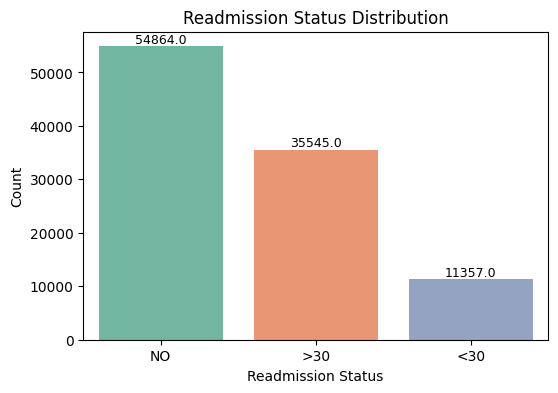

In [10]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='readmitted', data=df, palette='Set2', order=df['readmitted'].value_counts().index)

# Number on top of the bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title('Readmission Status Distribution')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\2248732635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=df, palette='coolwarm', order=df['gender'].value_counts().index)


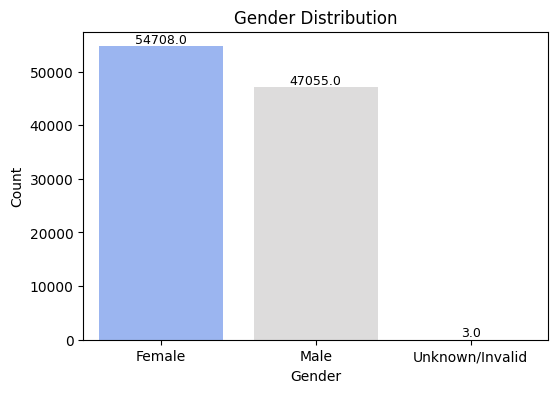

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', data=df, palette='coolwarm', order=df['gender'].value_counts().index)

# Number on top of the bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\4012914728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='age', data=df, palette='viridis', order=df['age'].value_counts().index)


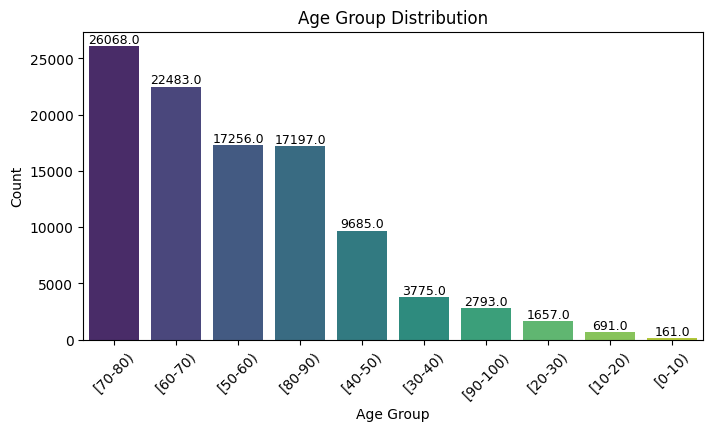

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='age', data=df, palette='viridis', order=df['age'].value_counts().index)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1926497731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='race', data=df, palette='crest', order=df['race'].value_counts().index)


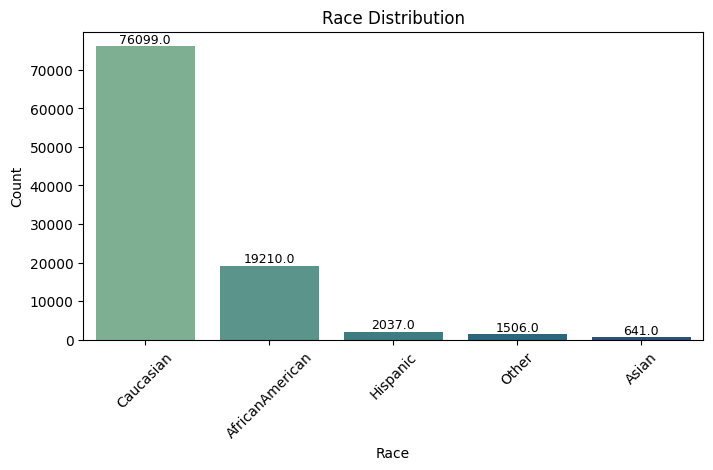

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='race', data=df, palette='crest', order=df['race'].value_counts().index)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\115220447.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weight_counts.index, y=weight_counts.values, palette="viridis")


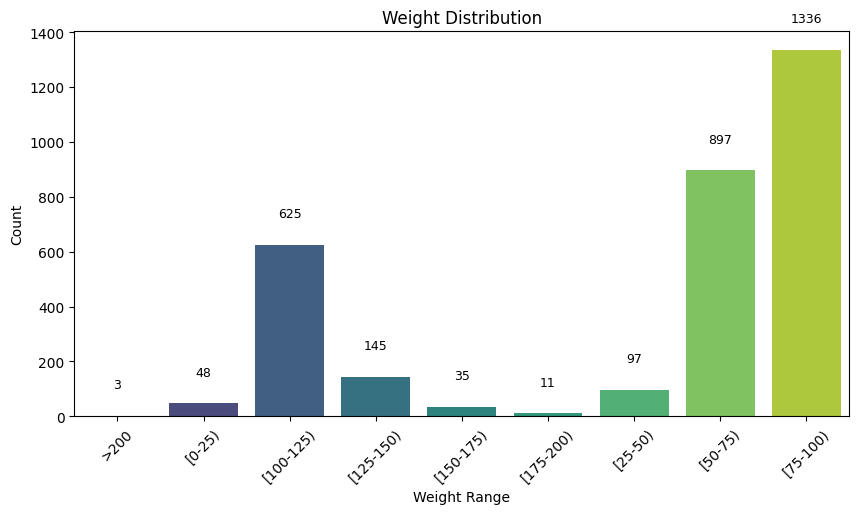

In [ ]:
weight_counts = df['weight'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=weight_counts.index, y=weight_counts.values, palette="viridis")

# Add labels
plt.xlabel("Weight Range")
plt.ylabel("Count")
plt.title("Weight Distribution")
plt.xticks(rotation=45)  

# Add number annotations above bars
for i, value in enumerate(weight_counts.values):
    plt.text(i, value + 100, str(value), ha='center', fontsize=9)

plt.show()

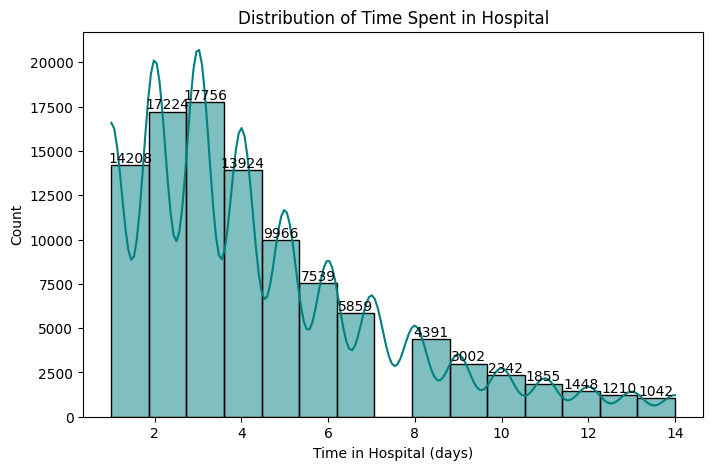

In [15]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['time_in_hospital'], bins=15, kde=True, color="teal")

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Time in Hospital (days)")
plt.ylabel("Count")
plt.title("Distribution of Time Spent in Hospital")
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1267371769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['diabetesMed'], palette="Set2")


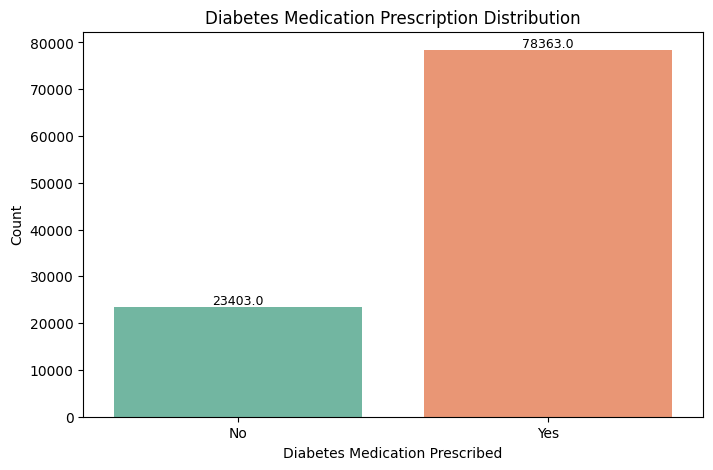

In [16]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['diabetesMed'], palette="Set2")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.xlabel("Diabetes Medication Prescribed")
plt.ylabel("Count")
plt.title("Diabetes Medication Prescription Distribution")
plt.show()

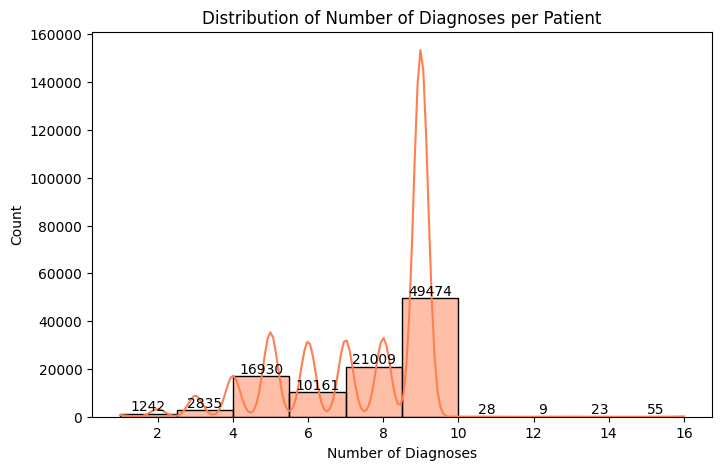

In [17]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['number_diagnoses'], bins=10, kde=True, color="coral")

# Add annotations
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Avoid placing labels on empty bins
        ax.annotate(f'{int(height)}', 
                    (patch.get_x() + patch.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Number of Diagnoses")
plt.ylabel("Count")
plt.title("Distribution of Number of Diagnoses per Patient")
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\611082123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['admission_type_id'], palette="viridis")


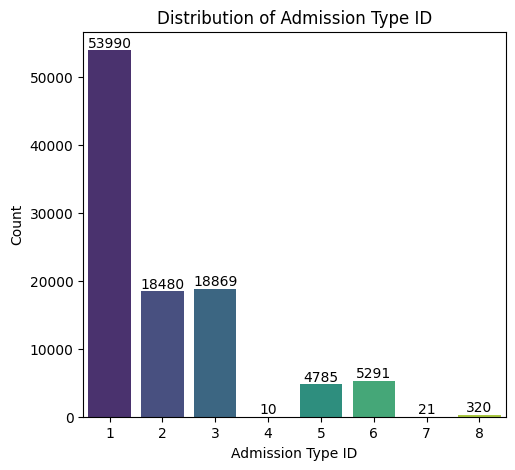

In [18]:
plt.figure(figsize=(12, 5))

# Plot Admission Type ID Distribution
plt.subplot(1, 2, 1)
ax = sns.countplot(x=df['admission_type_id'], palette="viridis")
plt.xlabel("Admission Type ID")
plt.ylabel("Count")
plt.title("Distribution of Admission Type ID")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1253937231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['discharge_disposition_id'], palette="Blues_r")  # Adjust color for clarity


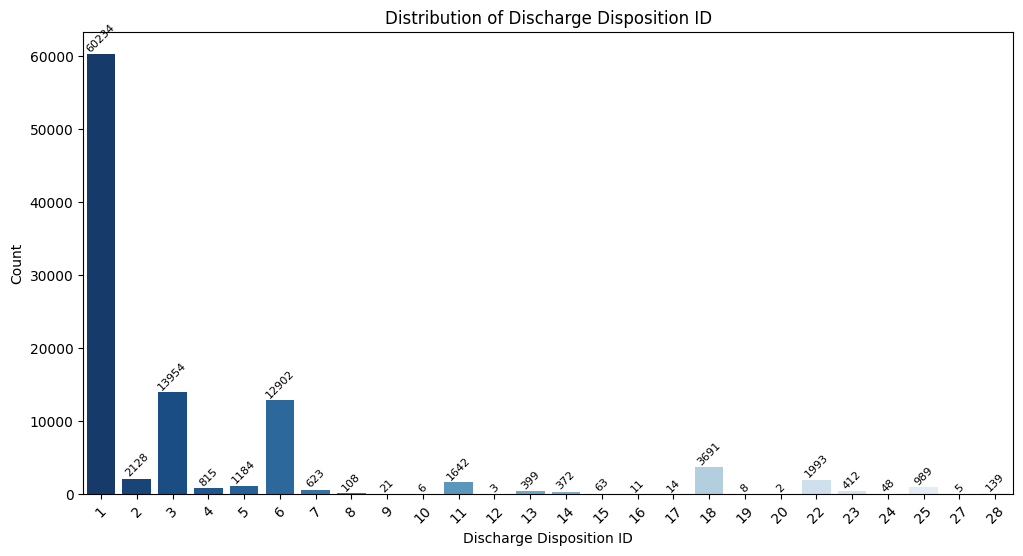

In [ ]:
plt.figure(figsize=(12,6))  
ax = sns.countplot(x=df['discharge_disposition_id'], palette="Blues_r")  

plt.xlabel("Discharge Disposition ID")
plt.ylabel("Count")
plt.title("Distribution of Discharge Disposition ID")
plt.xticks(rotation=45)  

# Add annotations with a smaller font size
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=8, color='black', rotation=45)

plt.show()

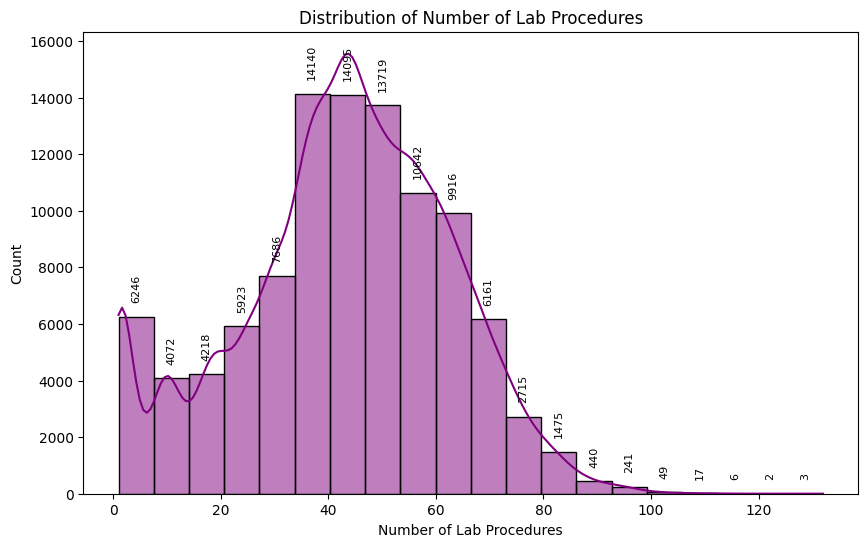

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df['num_lab_procedures'], bins=20, kde=True, color="purple")
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Count")
plt.title("Distribution of Number of Lab Procedures")

# Adjusting annotation position
for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height() + 500),  
                    ha='center', va='bottom', fontsize=8, color='black', rotation=90)

plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1619819284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['change'], palette="coolwarm")


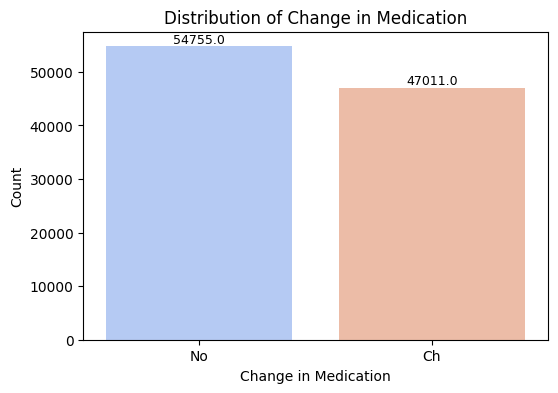

In [21]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['change'], palette="coolwarm")
plt.xlabel("Change in Medication")
plt.ylabel("Count")
plt.title("Distribution of Change in Medication")

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1371680004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['A1Cresult'], palette="viridis")


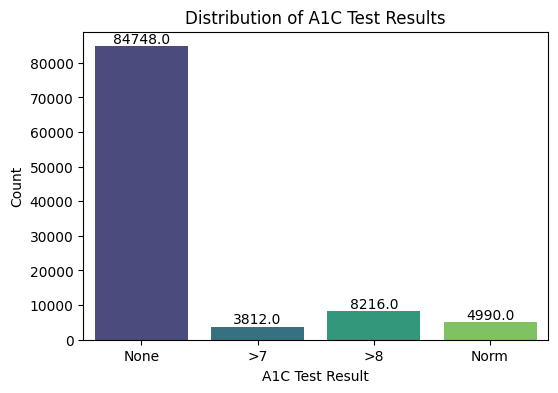

In [22]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['A1Cresult'], palette="viridis")
plt.xlabel("A1C Test Result")
plt.ylabel("Count")
plt.title("Distribution of A1C Test Results")

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1601787623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['max_glu_serum'], palette="viridis")


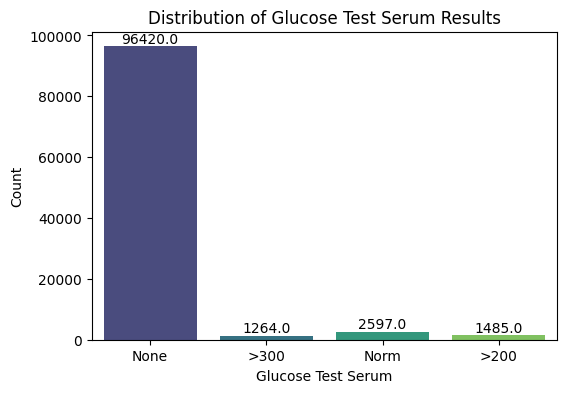

In [23]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['max_glu_serum'], palette="viridis")
plt.xlabel("Glucose Test Serum")
plt.ylabel("Count")
plt.title("Distribution of Glucose Test Serum Results")

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

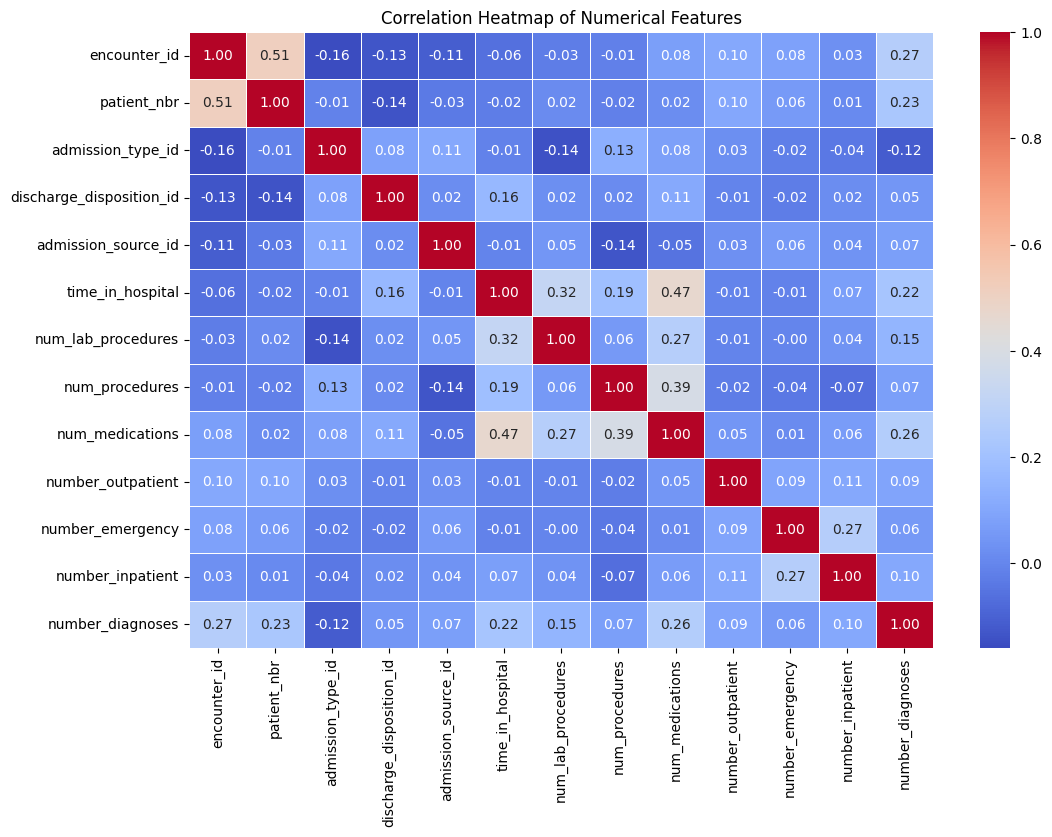

In [24]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

BIVARIATE ANALYSIS


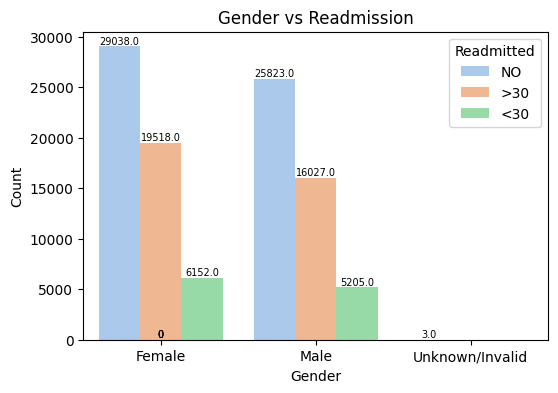

In [25]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', hue='readmitted', data=df, palette='pastel')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=7)

# Labels and title
plt.title('Gender vs Readmission')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

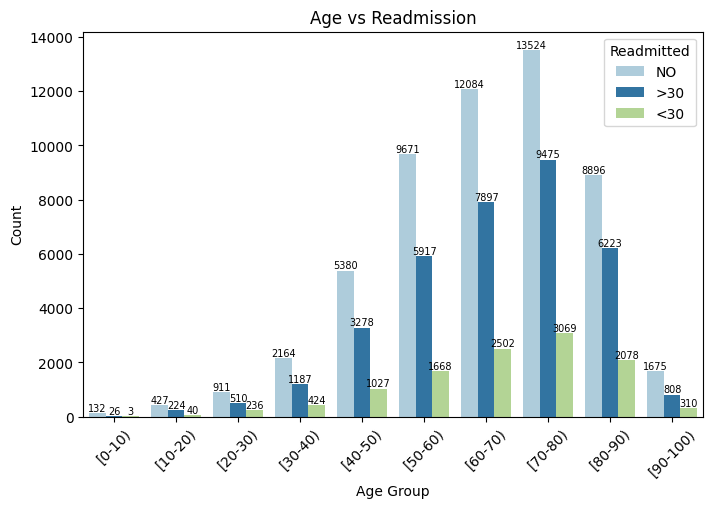

In [26]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='age', hue='readmitted', palette='Paired')

# Add annotations for counts
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid annotating empty bars
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=7, color='black')

# Customize plot
plt.title("Age vs Readmission")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Readmitted", labels=["NO", ">30", "<30"])
plt.show()

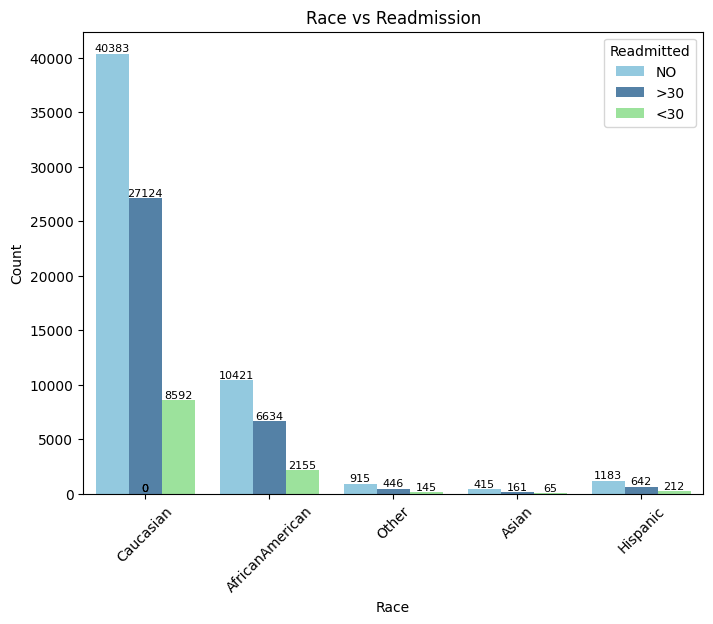

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="race", hue="readmitted", palette=["skyblue", "steelblue", "lightgreen"])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8)

# Labels and title
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Race vs Readmission")
plt.legend(title="Readmitted", labels=["NO", ">30", "<30"])
plt.xticks(rotation=45)
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\940276769.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == "NO"], x="time_in_hospital", label="Not Readmitted", color="blue", shade=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\940276769.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == ">30"], x="time_in_hospital", label="Readmitted >30 days", color="green", shade=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\940276769.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == "<30"], x="time_in_hospital", label="Readmi

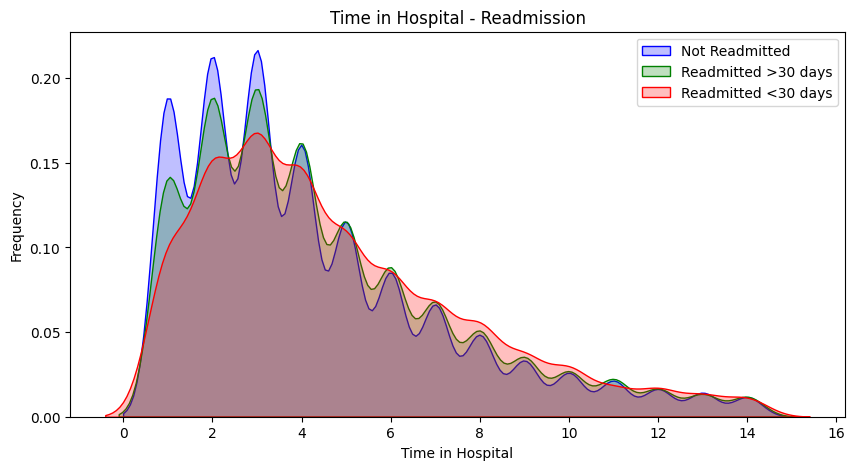

In [28]:
plt.figure(figsize=(10, 5))

# KDE plot for time spent in hospital with readmission hue
sns.kdeplot(data=df[df["readmitted"] == "NO"], x="time_in_hospital", label="Not Readmitted", color="blue", shade=True)
sns.kdeplot(data=df[df["readmitted"] == ">30"], x="time_in_hospital", label="Readmitted >30 days", color="green", shade=True)
sns.kdeplot(data=df[df["readmitted"] == "<30"], x="time_in_hospital", label="Readmitted <30 days", color="red", shade=True)

# Labels and title
plt.xlabel("Time in Hospital")
plt.ylabel("Frequency")
plt.title("Time in Hospital - Readmission")
plt.legend()

# Show plot
plt.show()

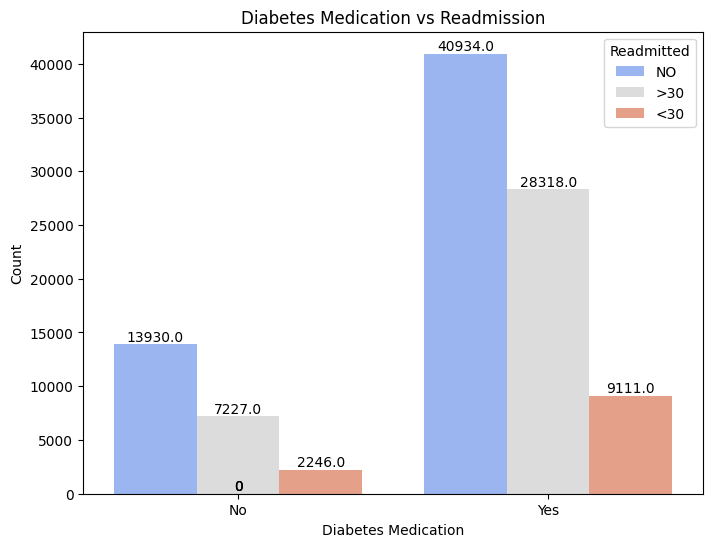

In [29]:
plt.figure(figsize=(8, 6))

# Create a count plot
ax = sns.countplot(data=df, x="diabetesMed", hue="readmitted", palette="coolwarm")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel("Diabetes Medication")
plt.ylabel("Count")
plt.title("Diabetes Medication vs Readmission")
plt.legend(title="Readmitted")

# Show plot
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\228955659.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == "NO"], x="number_diagnoses", label="Not Readmitted", color="blue", shade=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\228955659.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == ">30"], x="number_diagnoses", label="Readmitted >30 days", color="green", shade=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\228955659.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == "<30"], x="number_diagnoses", label="Readmi

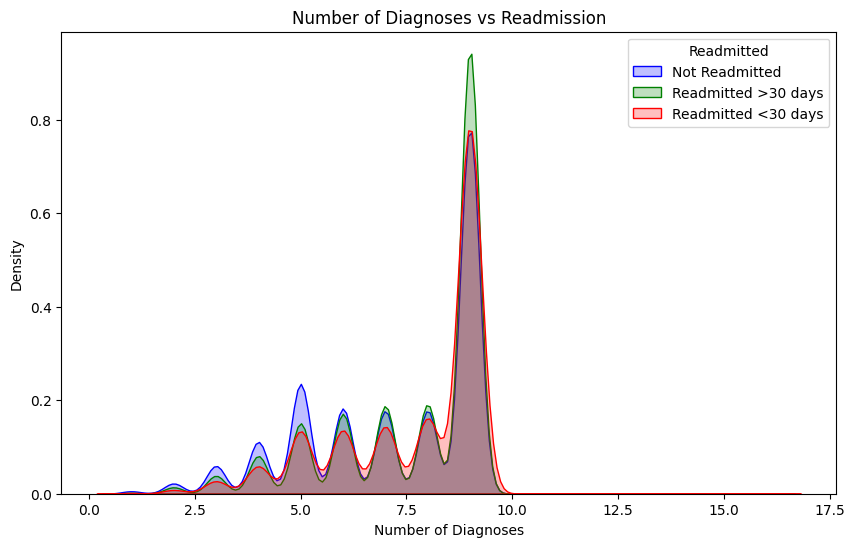

In [30]:
plt.figure(figsize=(10, 6))

# Create KDE plot
sns.kdeplot(data=df[df["readmitted"] == "NO"], x="number_diagnoses", label="Not Readmitted", color="blue", shade=True)
sns.kdeplot(data=df[df["readmitted"] == ">30"], x="number_diagnoses", label="Readmitted >30 days", color="green", shade=True)
sns.kdeplot(data=df[df["readmitted"] == "<30"], x="number_diagnoses", label="Readmitted <30 days", color="red", shade=True)

# Labels and title
plt.xlabel("Number of Diagnoses")
plt.ylabel("Density")
plt.title("Number of Diagnoses vs Readmission")
plt.legend(title="Readmitted")

# Show plot
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\31350311.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == "NO"], x="num_lab_procedures", label="Not Readmitted", color="blue", shade=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\31350311.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == ">30"], x="num_lab_procedures", label="Readmitted >30 days", color="green", shade=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\31350311.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df["readmitted"] == "<30"], x="num_lab_procedures", label="Rea

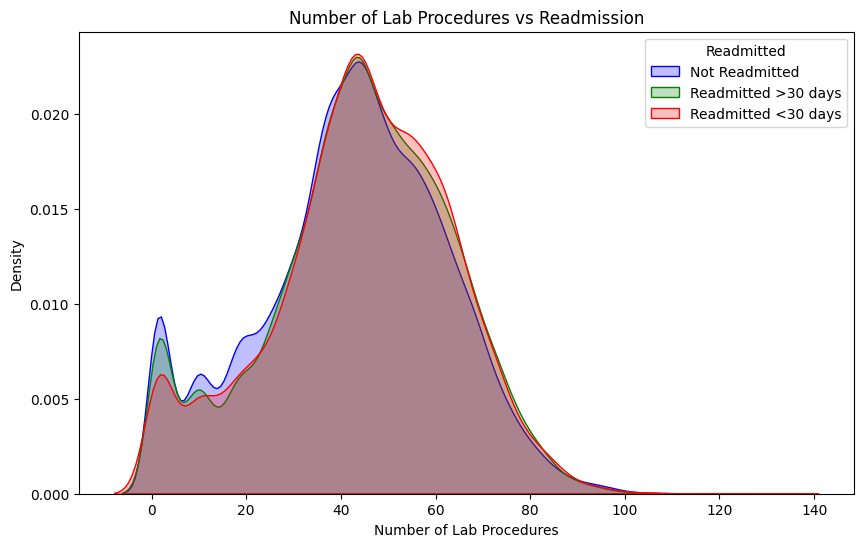

In [31]:
plt.figure(figsize=(10, 6))

# Create KDE plot for lab procedures
sns.kdeplot(data=df[df["readmitted"] == "NO"], x="num_lab_procedures", label="Not Readmitted", color="blue", shade=True)
sns.kdeplot(data=df[df["readmitted"] == ">30"], x="num_lab_procedures", label="Readmitted >30 days", color="green", shade=True)
sns.kdeplot(data=df[df["readmitted"] == "<30"], x="num_lab_procedures", label="Readmitted <30 days", color="red", shade=True)

# Labels and title
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Density")
plt.title("Number of Lab Procedures vs Readmission")
plt.legend(title="Readmitted")

# Show plot
plt.show()

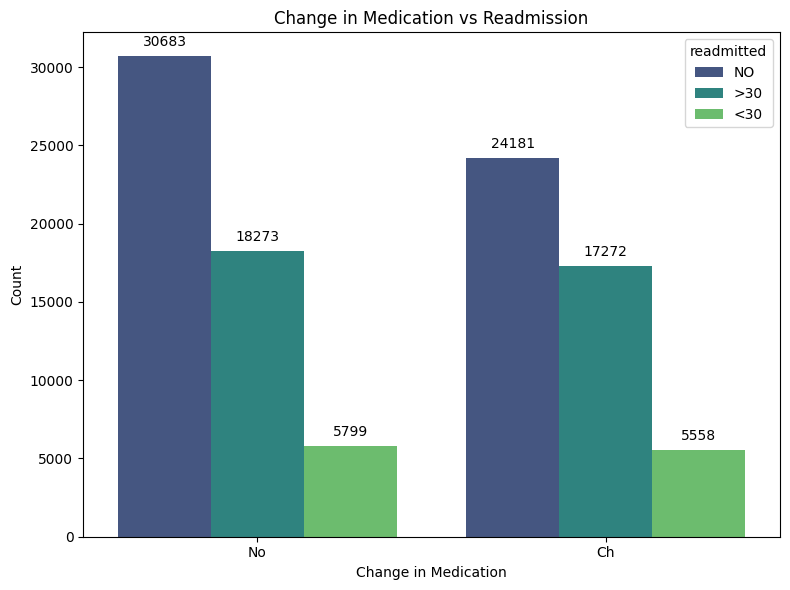

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df, x="change", hue="readmitted", palette="viridis")

# Add annotations to each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width()/2, height), 
            ha='center', 
            va='bottom', 
            fontsize=10,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )
# Labels and title
plt.xlabel("Change in Medication")
plt.ylabel("Count")
plt.title("Change in Medication vs Readmission")

plt.tight_layout()
plt.show()

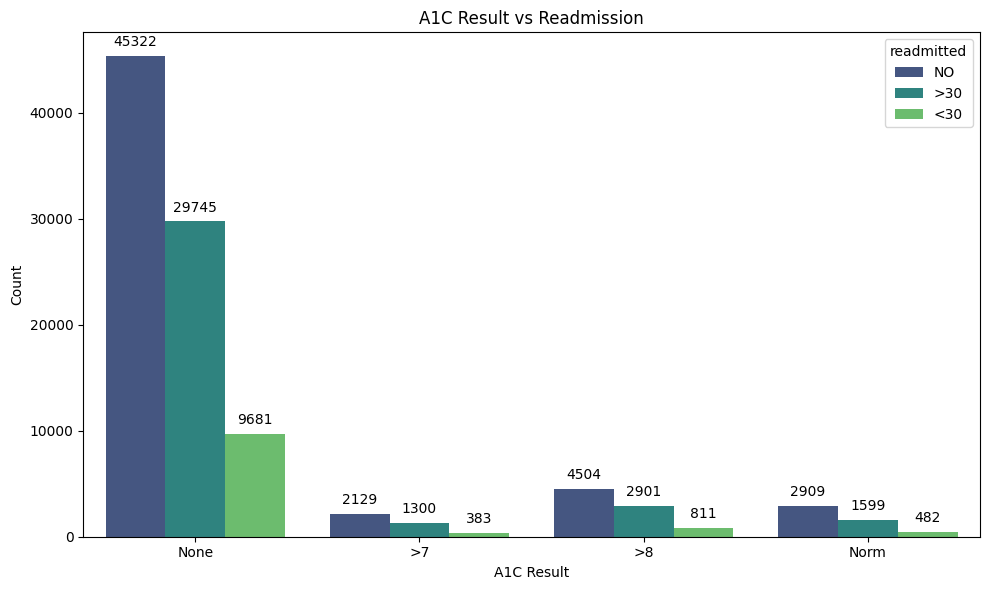

In [ ]:
plt.figure(figsize=(10, 6))

# Create the plot and get axes object
ax = sns.countplot(data=df, x="A1Cresult", hue="readmitted", palette="viridis")

# Add annotations to each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width()/2, height), 
            ha='center', 
            va='bottom', 
            fontsize=10,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.xlabel("A1C Result")
plt.ylabel("Count")
plt.title("A1C Result vs Readmission")

# Adjust layout
plt.tight_layout()
plt.show()

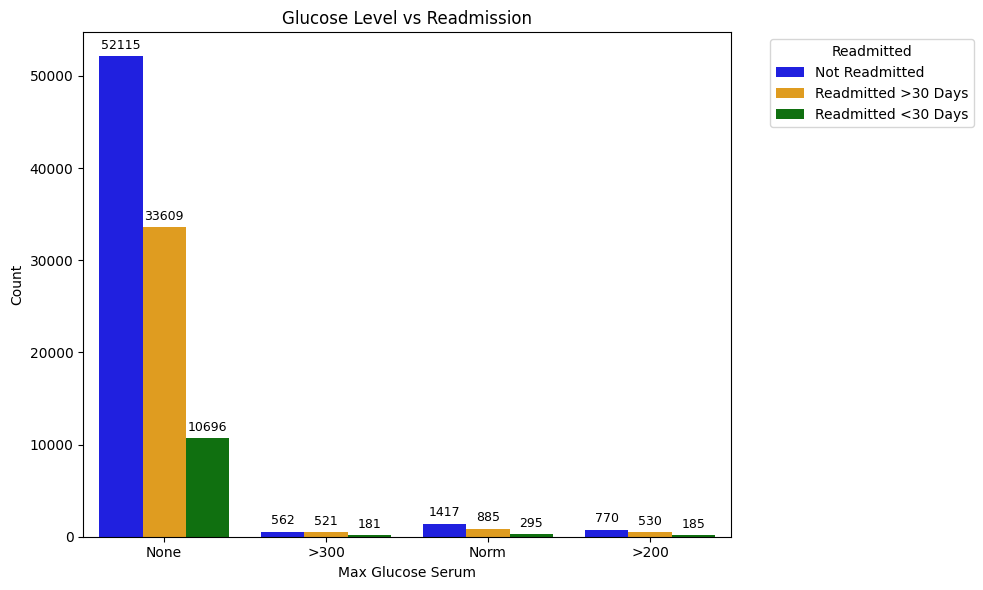

In [ ]:
plt.figure(figsize=(10, 6))


ax = sns.countplot(data=df, x="max_glu_serum", hue="readmitted", palette=["blue", "orange", "green"])

# Add annotations to each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(
            f'{int(height)}', 
            (p.get_x() + p.get_width()/2, height), 
            ha='center', 
            va='bottom', 
            fontsize=9,
            color='black',
            xytext=(0, 3),
            textcoords='offset points'
        )

plt.xlabel("Max Glucose Serum")
plt.ylabel("Count")
plt.title("Glucose Level vs Readmission")
plt.legend(
    title="Readmitted", 
    labels=["Not Readmitted", "Readmitted >30 Days", "Readmitted <30 Days"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.tight_layout()
plt.show()

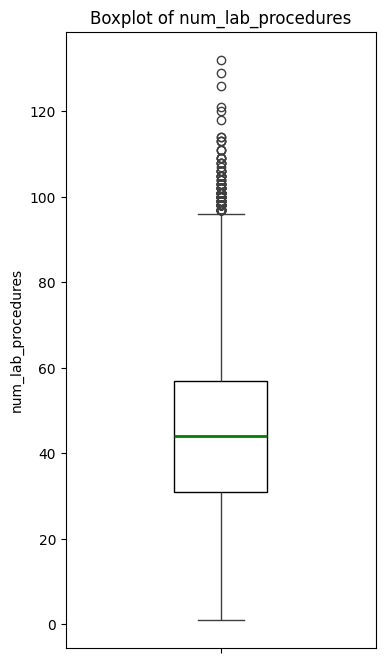

In [ ]:
plt.figure(figsize=(4, 8))  # Maintain a narrow figure size
sns.boxplot(y=df['num_lab_procedures'], 
            width=0.3,  # Makes the box thinner
            boxprops=dict(facecolor="white", edgecolor="black"),  # White box, black edges
            medianprops=dict(color="green", linewidth=2))  # Green median line

plt.xticks(rotation=45)  
plt.xlabel("")  # Hide x-axis label
plt.ylabel("num_lab_procedures")  
plt.title("Boxplot of num_lab_procedures")

plt.show()

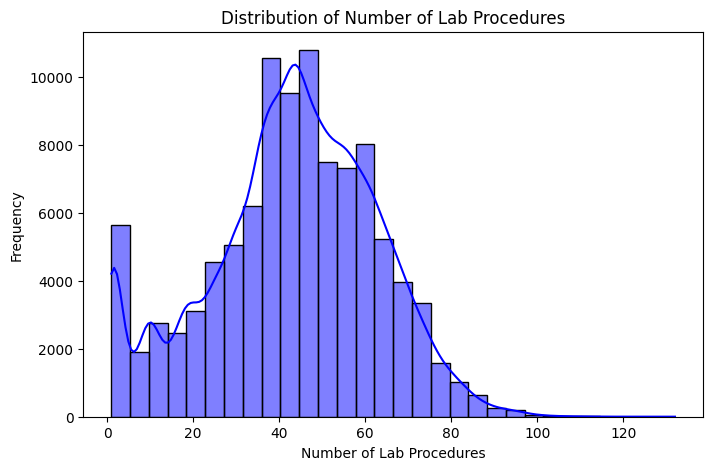

In [36]:
plt.figure(figsize=(8, 5))

# Create histogram
sns.histplot(df['num_lab_procedures'], bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Lab Procedures")

# Show plot
plt.show()

PREPROCESSING

REMOVING NULL VALUES

In [37]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [38]:
#Dropping high % of missing values
columns_to_drop = ["weight", "payer_code", "medical_specialty"]
df.drop(columns=columns_to_drop, inplace=True)

In [39]:
#Filling in the lower % with the most common values

df["race"].fillna(df["race"].mode()[0], inplace=True)
df["diag_1"].fillna(df["diag_1"].mode()[0], inplace=True)
df["diag_2"].fillna(df["diag_2"].mode()[0], inplace=True)
df["diag_3"].fillna(df["diag_3"].mode()[0], inplace=True)

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3425996051.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["race"].fillna(df["race"].mode()[0], inplace=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3425996051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [40]:
#Mapping admission to NA, and then mode imputation
df['admission_type_id'] = df['admission_type_id'].replace([5, 6, 8], np.nan)
df['admission_type_id'].fillna(df['admission_type_id'].mode()[0], inplace=True)

#Mapping discharge disposition to NA and then dropping them
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([25, 26, 18], np.nan)
df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0], inplace=True)

#Mapping admission source to NA and then dropping them
df['admission_source_id'] = df['admission_source_id'].replace([9, 15, 17, 20, 21], np.nan)
df['admission_source_id'].fillna(df['admission_source_id'].mode()[0], inplace=True)

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3070300822.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission_type_id'].fillna(df['admission_type_id'].mode()[0], inplace=True)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3070300822.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

DROPPING COLUMNS

In [41]:
df = df.drop(columns=['encounter_id', 'citoglipton', 'examide'])

In [42]:
df = df.drop(columns=['diag_2', 'diag_3'])

OUTLIERS

In [43]:
# Winsorize the column (caps outliers at the 5th and 95th percentiles)
df['num_lab_procedures'] = winsorize(df['num_lab_procedures'], limits=[0.05, 0.05])  

DATA TRANSFORMATION

In [44]:
#Transforming target to binary
df["readmitted"] = df["readmitted"].map({"NO": 0, "<30": 1, ">30": 1})

In [45]:
#Removing Unknown/Invalid from gender
df = df[df['gender'] != 'Unknown/Invalid']

In [46]:
def map_diagnosis(df, cols):
    for col in cols:
        # Convert to string to check for 'V' and 'E' codes
        df[col] = df[col].astype(str)
        df.loc[(df[col].str.contains("V")) | (df[col].str.contains("E")), col] = -1
        df[col] = df[col].astype(float)  # Convert back to float

    for col in cols:
        df["temp_diag"] = "Other"
        df.loc[(df[col].astype(float) >= 390) & (df[col].astype(float) <= 459) | (df[col] == "785"), "temp_diag"] = "Circulatory"
        df.loc[(df[col].astype(float) >= 460) & (df[col].astype(float) <= 519) | (df[col] == "786"), "temp_diag"] = "Respiratory"
        df.loc[(df[col].astype(float) >= 520) & (df[col].astype(float) <= 579) | (df[col] == "787"), "temp_diag"] = "Digestive"
        df.loc[(df[col].astype(float) >= 250) & (df[col].astype(float) < 251), "temp_diag"] = "Diabetes"
        df.loc[(df[col].astype(float) >= 800) & (df[col].astype(float) <= 999), "temp_diag"] = "Injury"
        df.loc[(df[col].astype(float) >= 710) & (df[col].astype(float) <= 739), "temp_diag"] = "Musculoskeletal"
        df.loc[(df[col].astype(float) >= 580) & (df[col].astype(float) <= 629) | (df[col] == "788"), "temp_diag"] = "Genitourinary"
        df.loc[(df[col].astype(float) >= 140) & (df[col].astype(float) <= 239), "temp_diag"] = "Neoplasms"

        df[col] = df["temp_diag"]
        df = df.drop("temp_diag", axis=1)

    return df

# Apply function to your dataframe
df = map_diagnosis(df, ["diag_1"])

ENCODING

In [47]:
#Encoding to make categorial into binary
df['change'] = df['change'].map({'Ch': 1, 'No': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['diabetesMed'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})

In [48]:
age_mapping = {
    '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4,
    '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9
}

df['age'] = df['age'].map(age_mapping)  


In [49]:
race_mapping = {
    'Caucasian': 0,
    'AfricanAmerican': 1,
    'Other': 2,
    'Asian': 3,
    'Hispanic': 4
}

# Apply encoding to the 'race' column
df['race'] = df['race'].map(race_mapping)

In [50]:
diagnosis_mapping = {
    "Circulatory": 1,
    "Respiratory": 2,
    "Digestive": 3,
    "Diabetes": 4,
    "Injury": 5,
    "Musculoskeletal": 6, 
    "Genitourinary": 7,
    "Neoplasms": 8,
    "Other": 9
}

# Apply mapping to the already categorized diagnosis columns
for col in ['diag_1']:
    df[col] = df[col].map(diagnosis_mapping)

Discharge Disposition ID

In [51]:
def simplify_discharge(value):
    if value in [1, 6, 8]: 
        return "Home Discharge"
    elif value in [2, 3, 4, 5, 15, 16, 17, 22, 23, 24, 27, 28]: 
        return "Transferred to Another Facility"
    elif value in [11, 19, 20, 21]: 
        return "Expired"
    elif value in [13, 14]: 
        return "Hospice"
    elif value == 7: 
        return "Left AMA"
    elif value == 12: 
        return "Still Patient"
    else:
        return None  # Treat NULL, Not Mapped, and Unknown/Invalid as missing values

# Apply the function
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(simplify_discharge)

#Further mapping
discharge_mapping = {
    "Home Discharge": 0,
    "Transferred to Another Facility": 1,
    "Expired": 2,
    "Hospice": 3,
    "Left AMA": 4,
    "Still Patient": 5
}

# Apply mapping
df['discharge_disposition_id'] = df['discharge_disposition_id'].map(discharge_mapping)

Admission Type ID 

In [52]:
def simplify_admission(value):
    if value == 1:
        return "Emergency"
    elif value == 2:
        return "Urgent"
    elif value == 3:
        return "Elective"
    elif value == 4:
        return "Newborn"
    elif value == 7:
        return "Trauma Center"
    else:
        return None  # Treat NULL, Not Available, and Not Mapped as missing values

# Apply the function
df['admission_type_id'] = df['admission_type_id'].apply(simplify_admission)

#Furhter encoding

mapping_admission = {
    "Emergency": 0,
    "Urgent": 1,
    "Elective": 2,
    "Newborn": 3,
    "Trauma Center": 4
}

df['admission_type_id'] = df['admission_type_id'].map(mapping_admission)

In [53]:
df['admission_type_id'].value_counts()

admission_type_id
0    64384
2    18868
1    18480
4       21
3       10
Name: count, dtype: int64

Admission Source ID

In [54]:
def simplify_admission_source(value):
    if value in [1, 2, 3]: 
        return "Referral"
    elif value in [4, 5, 6, 10, 18, 22, 25, 26]: 
        return "Transfer from Healthcare Facility"
    elif value in [7, 8]: 
        return "Emergency"
    elif value in [11, 12, 13, 14, 23, 24]: 
        return "Birth/Neonatal"
    elif value in [19]: 
        return "Readmission/Home Health"
    else: 
        return "Other/Unknown"

# Apply the function
df['admission_source_id'] = df['admission_source_id'].apply(simplify_admission_source)

#Further mapping
admission_source_mapping = {
    "Referral": 0,
    "Transfer from Healthcare Facility": 1,
    "Emergency": 2,
    "Birth/Neonatal": 3,
    "Readmission/Home Health": 4,
}

df['admission_source_id'] = df['admission_source_id'].map(admission_source_mapping)

Feature Engineering

In [55]:
#Number of Medication Changes

keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 
        'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

# Create 'numchange' by summing up all medication changes
df['numchange'] = df[keys].applymap(lambda x: 1 if x not in ['No', 'Steady'] else 0).sum(axis=1)

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3191685161.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['numchange'] = df[keys].applymap(lambda x: 1 if x not in ['No', 'Steady'] else 0).sum(axis=1)


In [56]:
#Number of visits per patient using their patient number

df['number_of_visits'] = df.groupby('patient_nbr')['patient_nbr'].transform('count')

VISUALIZATION (AFTER PREPROCESSING)

UNIVARIATE

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\623955766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='readmitted', data=df, palette='Set2', order=df['readmitted'].value_counts().index)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\623955766.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Readmitted'])


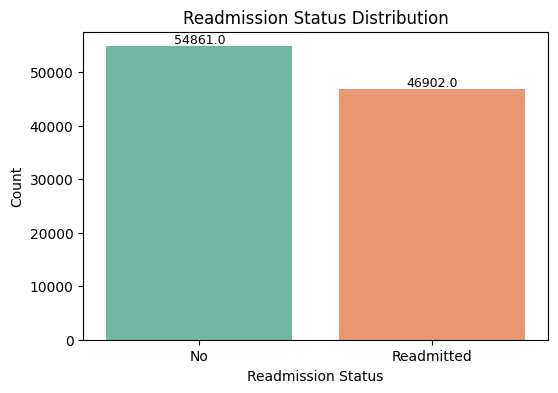

In [57]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='readmitted', data=df, palette='Set2', order=df['readmitted'].value_counts().index)

# Number on top of the bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Modify x-axis labels
ax.set_xticklabels(['No', 'Readmitted'])

plt.title('Readmission Status Distribution')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\544041254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=df, palette='Set2', order=df['gender'].value_counts().index)
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\544041254.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


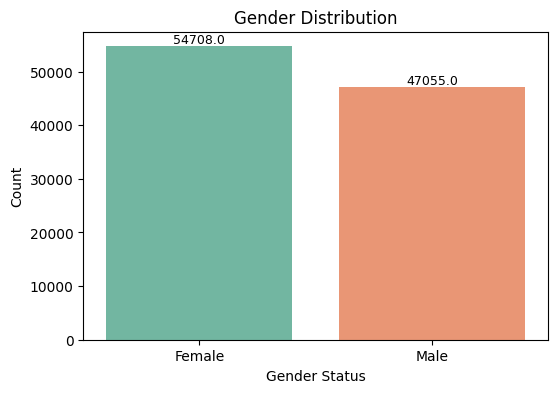

In [58]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', data=df, palette='Set2', order=df['gender'].value_counts().index)

# Number on top of the bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9)

# Modify x-axis labels
ax.set_xticklabels(['Female', 'Male'])

plt.title('Gender Distribution')
plt.xlabel('Gender Status')
plt.ylabel('Count')
plt.show()

In [59]:
df['diag_1'].value_counts()

diag_1
1    30356
9    22595
2    10407
3     9208
4     8757
5     6972
7     5078
6     4957
8     3433
Name: count, dtype: int64

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1747332144.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="diag_1", palette="viridis", order=sorted(df["diag_1"].unique()))
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1747332144.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([diag_labels[val] for val in sorted(df["diag_1"].unique())])


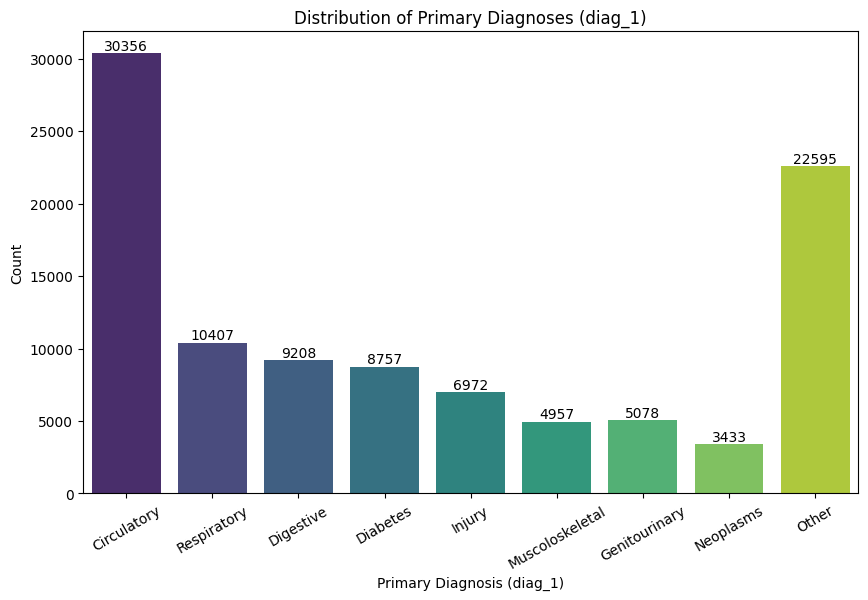

In [60]:
diag_labels = {
    1: "Circulatory",
    2: "Respiratory",
    3: "Digestive",
    4: "Diabetes",
    5: "Injury",
    6: "Muscoloskeletal",
    7: "Genitourinary",
    8: "Neoplasms",
    9: "Other"
}

# Set figure size
plt.figure(figsize=(10, 6))

# Plot bar chart
ax = sns.countplot(data=df, x="diag_1", palette="viridis", order=sorted(df["diag_1"].unique()))

# Set axis labels and title
plt.xlabel("Primary Diagnosis (diag_1)")
plt.ylabel("Count")
plt.title("Distribution of Primary Diagnoses (diag_1)")

# Update x-axis tick labels using the mapping
ax.set_xticklabels([diag_labels[val] for val in sorted(df["diag_1"].unique())])

# Add value labels on bars
for bar in ax.containers:
    ax.bar_label(bar, fmt="%d")

plt.xticks(rotation=30)  # Rotate labels for readability
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1355877434.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="discharge_disposition_id", palette="viridis")
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\1355877434.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([discharge_labels[x] for x in ax.get_xticks()], rotation=45, ha="right")


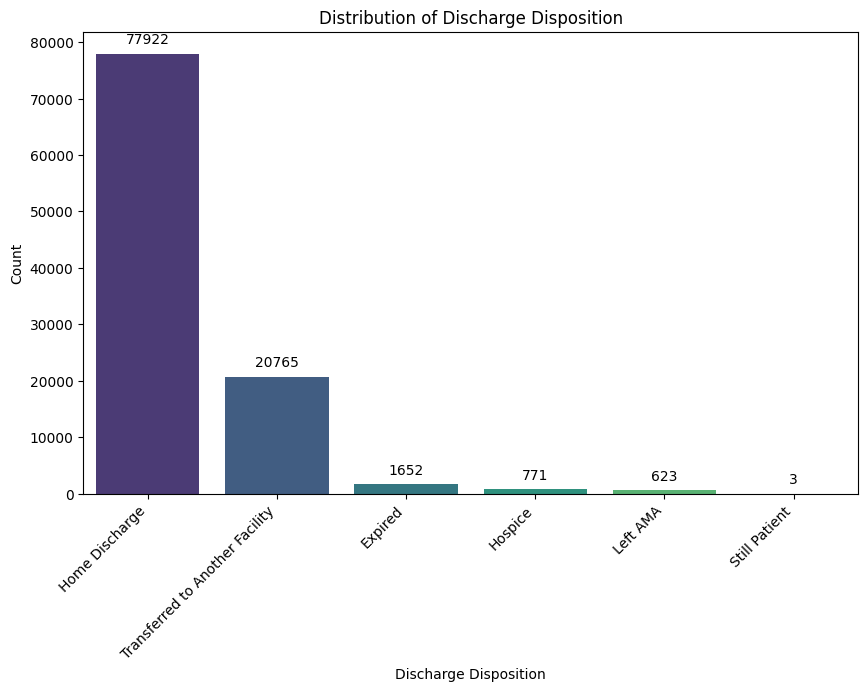

In [61]:
discharge_labels = {
    0: "Home Discharge",
    1: "Transferred to Another Facility",
    2: "Expired",
    3: "Hospice",
    4: "Left AMA",
    5: "Still Patient"
}

# Plot the count distribution without modifying the dataset
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="discharge_disposition_id", palette="viridis")

# Change x-tick labels to the corresponding discharge labels
ax.set_xticklabels([discharge_labels[x] for x in ax.get_xticks()], rotation=45, ha="right")

# Annotate bars with count values
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Titles and labels
plt.xlabel("Discharge Disposition")
plt.ylabel("Count")
plt.title("Distribution of Discharge Disposition")
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3252495942.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="admission_source_id", palette="viridis")
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3252495942.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([admission_labels[x] for x in ax.get_xticks()], rotation=45, ha="right")


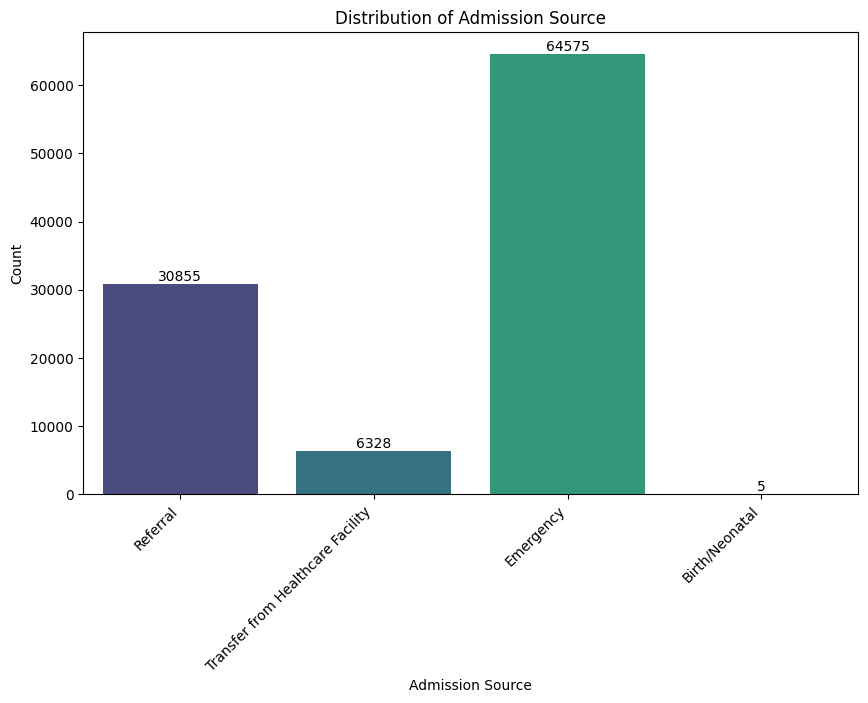

In [62]:
admission_labels = {
    0: "Referral",
    1: "Transfer from Healthcare Facility",
    2: "Emergency",
    3: "Birth/Neonatal",
    4: "Readmission/Home Health"
}

# Plot the count distribution without modifying the dataset
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="admission_source_id", palette="viridis")

# Change x-tick labels to the corresponding admission source labels
ax.set_xticklabels([admission_labels[x] for x in ax.get_xticks()], rotation=45, ha="right")

# Annotate bars with count values
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels
plt.xlabel("Admission Source")
plt.ylabel("Count")
plt.title("Distribution of Admission Source")
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3685913704.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="admission_type_id", palette="viridis")
C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3685913704.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([admission_type_labels[x] for x in ax.get_xticks()], rotation=45, ha="right")


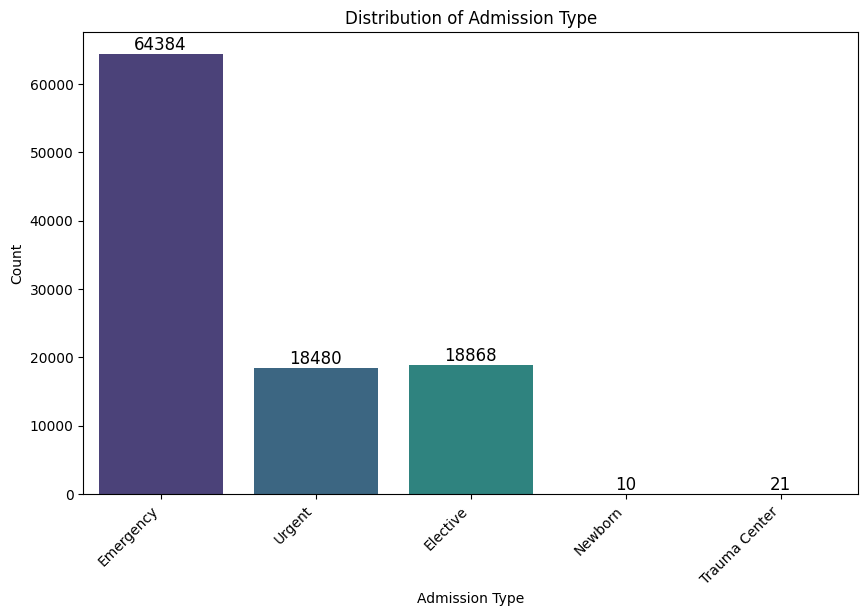

In [63]:
admission_type_labels = {
    0: "Emergency",
    1: "Urgent",
    2: "Elective",
    3: "Newborn",
    4: "Trauma Center"
}

# Plot the count distribution without modifying the dataset
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="admission_type_id", palette="viridis")

# Change x-tick labels to the corresponding admission type labels
ax.set_xticklabels([admission_type_labels[x] for x in ax.get_xticks()], rotation=45, ha="right")

# Annotate bars with count values
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.title("Distribution of Admission Type")
plt.show()

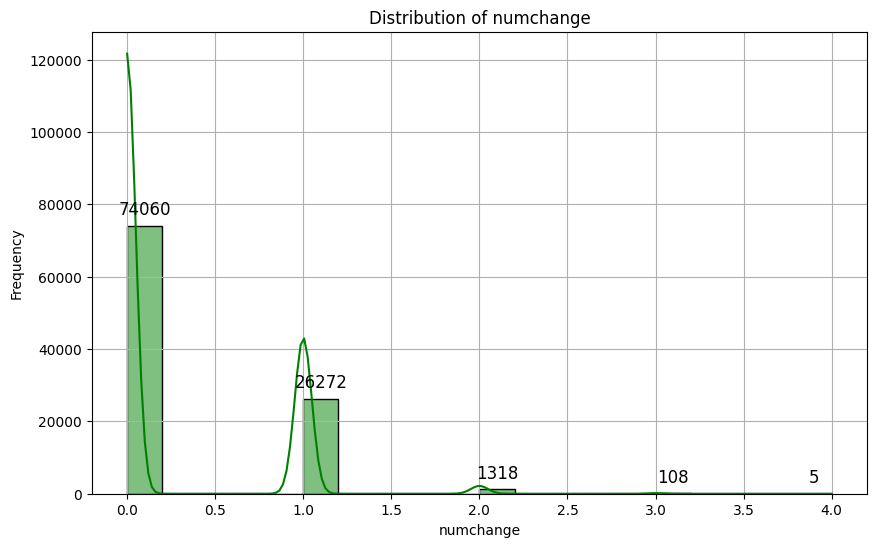

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['numchange'], kde=True, color='green', bins=20)

# Annotate only the bars with non-zero height
for patch in ax.patches:
    if patch.get_height() > 0:  # Only annotate bars that have a non-zero count
        ax.annotate(f'{int(patch.get_height())}', 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Titles and labels
plt.xlabel("numchange")
plt.ylabel("Frequency")
plt.title("Distribution of numchange")
plt.grid(True)
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3453973918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['number_of_visits'], palette="viridis")


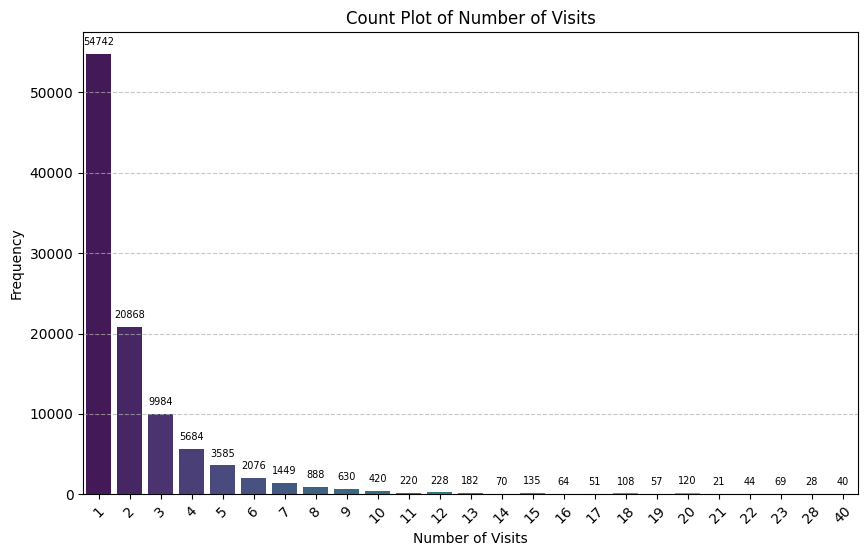

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['number_of_visits'], palette="viridis")

# Annotate the bars with the count values
for p in ax.patches:
    # Annotate each bar with the count value
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points')

# Titles and labels
plt.xlabel("Number of Visits")
plt.ylabel("Frequency")
plt.title("Count Plot of Number of Visits")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

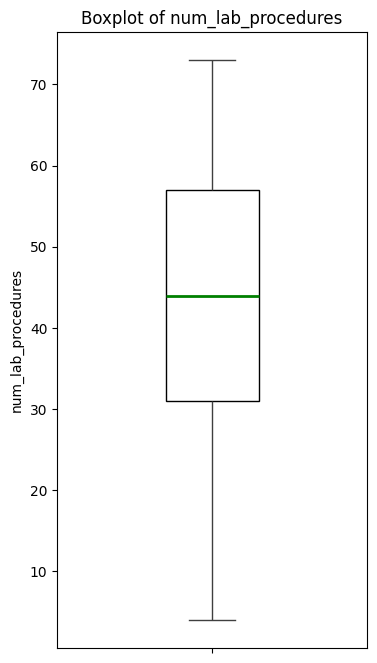

In [66]:
plt.figure(figsize=(4, 8))  # Maintain a narrow figure size
sns.boxplot(y=df['num_lab_procedures'], 
            width=0.3,  # Makes the box thinner
            boxprops=dict(facecolor="white", edgecolor="black"),  # White box, black edges
            medianprops=dict(color="green", linewidth=2))  # Green median line

plt.xticks(rotation=45)  # Rotate labels if needed
plt.xlabel("")  # Hide x-axis label
plt.ylabel("num_lab_procedures")  
plt.title("Boxplot of num_lab_procedures")

plt.show()

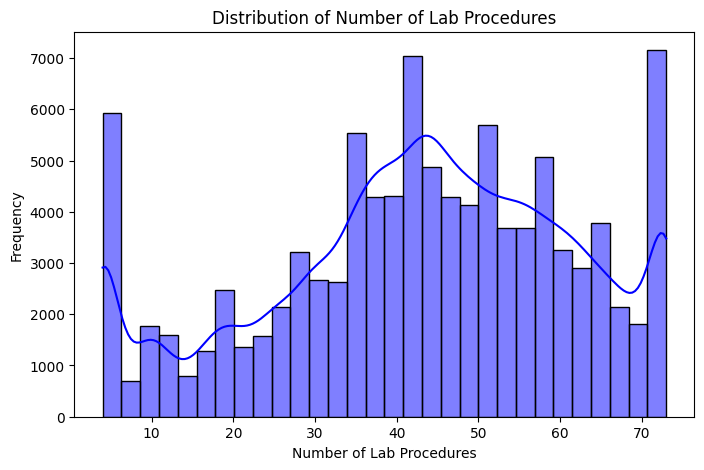

In [67]:
plt.figure(figsize=(8, 5))

# Create histogram
sns.histplot(df['num_lab_procedures'], bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Lab Procedures")

# Show plot
plt.show()

BIVARAITE ANALYSIS

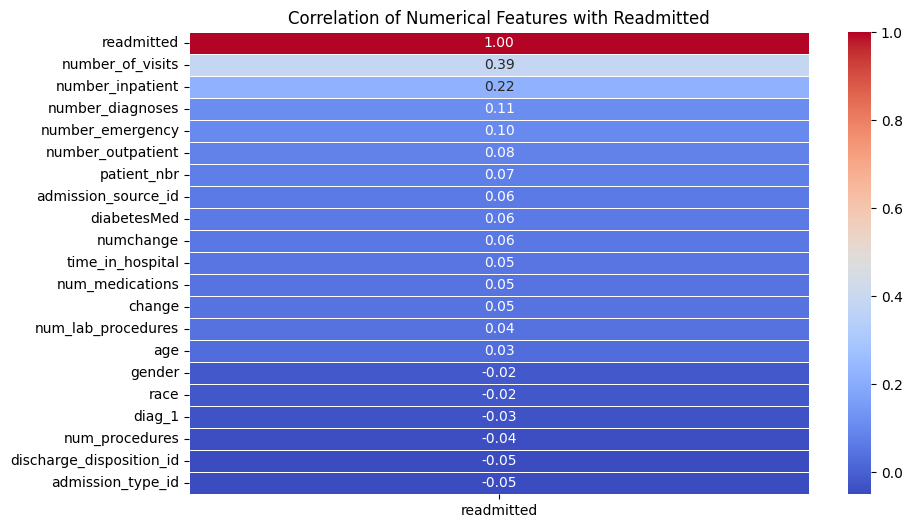

In [68]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Extract correlation with 'readmitted'
readmitted_corr = corr_matrix['readmitted'].sort_values(ascending=False)

# Plot heatmap of correlations with 'readmitted'
plt.figure(figsize=(10, 6))
sns.heatmap(readmitted_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Numerical Features with Readmitted")
plt.show()


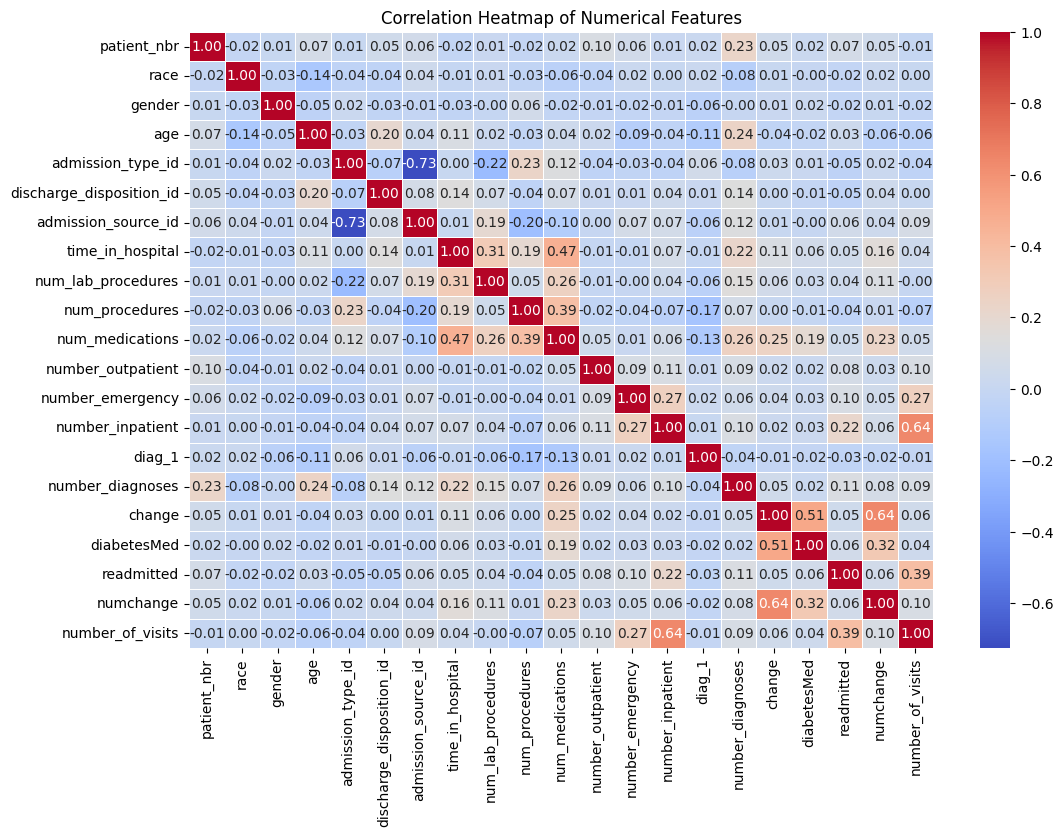

In [69]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

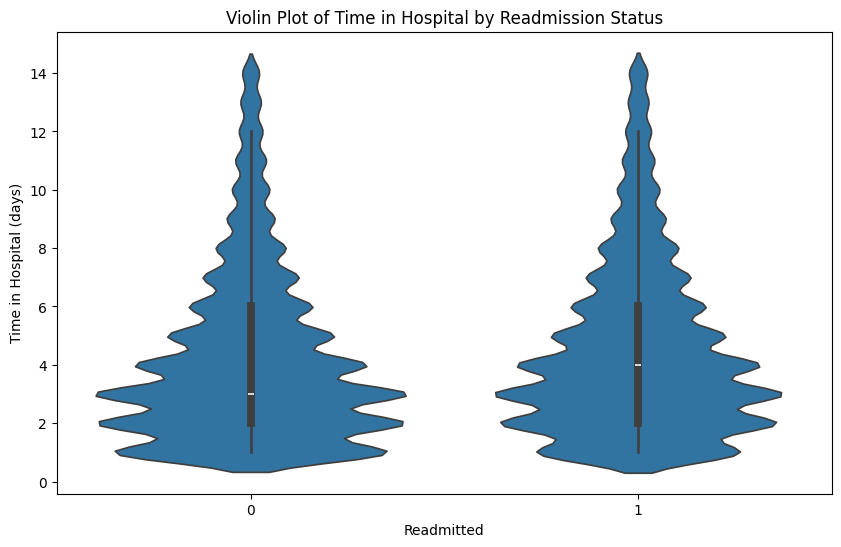

In [70]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="readmitted", y="time_in_hospital", data=df, inner="box")
plt.title("Violin Plot of Time in Hospital by Readmission Status")
plt.xlabel("Readmitted")
plt.ylabel("Time in Hospital (days)")
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\3641176168.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


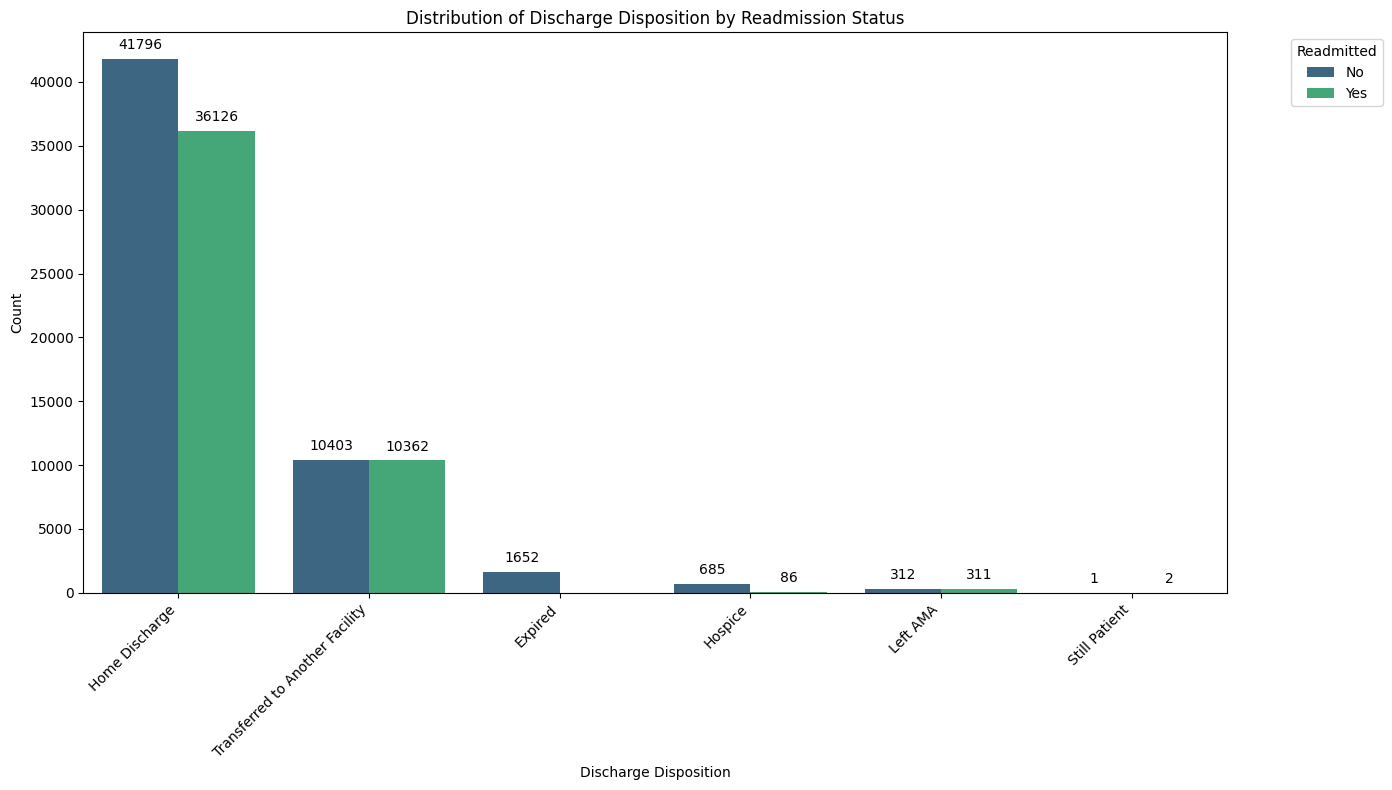

In [71]:
discharge_labels = {
    0: "Home Discharge",
    1: "Transferred to Another Facility",
    2: "Expired",
    3: "Hospice",
    4: "Left AMA",
    5: "Still Patient"
}

# Create a grouped bar plot (bivariate)
plt.figure(figsize=(14, 8))
ax = sns.countplot(
    data=df,
    x="discharge_disposition_id",
    hue="readmitted",  # Split bars by readmission status
    palette="viridis"
)

# Replace x-tick labels with discharge disposition names
ax.set_xticklabels(
    [discharge_labels[x] for x in ax.get_xticks()],
    rotation=45,
    ha="right"
)

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid annotating empty bars
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

# Label axes and title
plt.xlabel("Discharge Disposition")
plt.ylabel("Count")
plt.title("Distribution of Discharge Disposition by Readmission Status")

# Update legend to show "No" and "Yes" instead of 0/1
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['No', 'Yes'],  # Replace 0/1 with labels
    title='Readmitted',
    bbox_to_anchor=(1.05, 1),  # Move legend outside plot
    loc='upper left'
)

plt.tight_layout()
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\2288101930.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([diag_labels[val] for val in sorted(df["diag_1"].unique())])


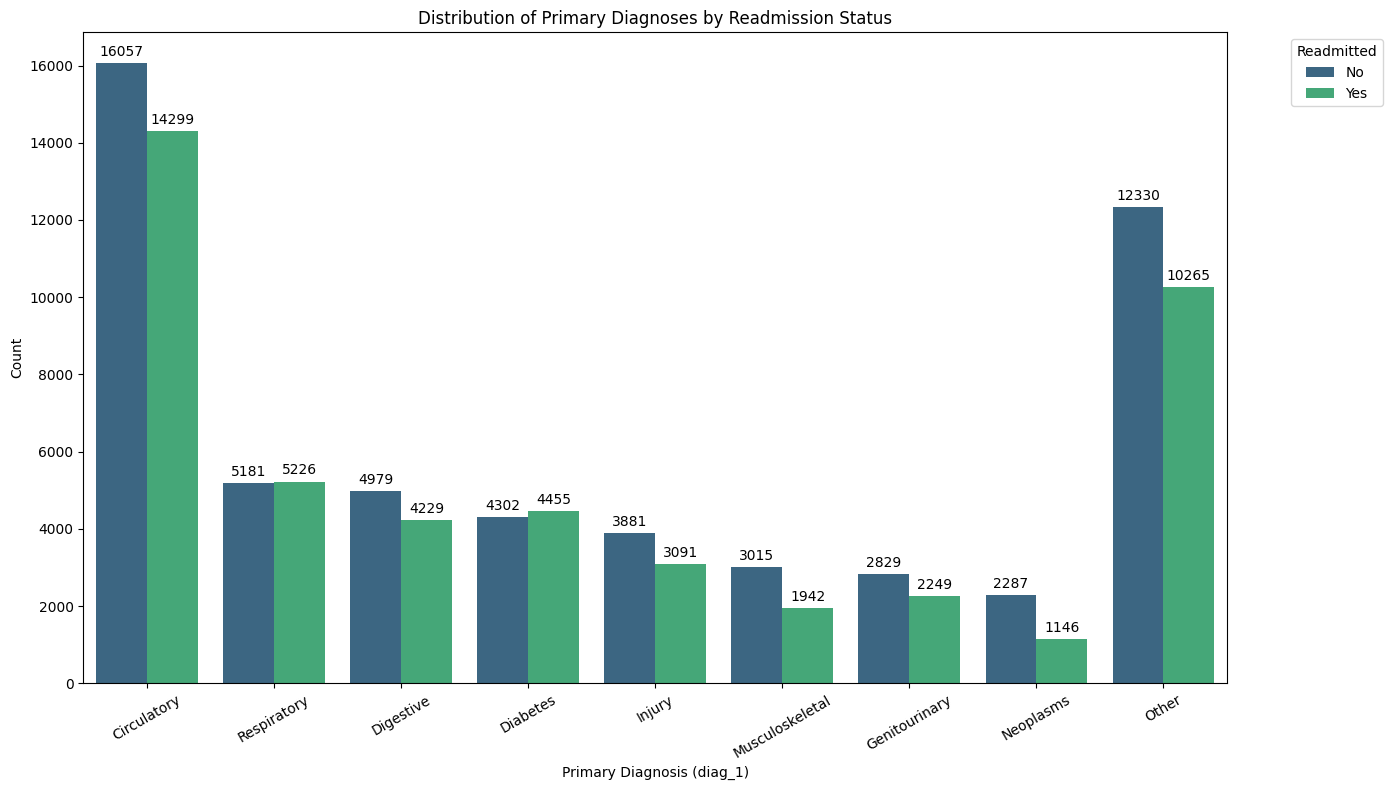

In [72]:
diag_labels = {
    1: "Circulatory",
    2: "Respiratory",
    3: "Digestive",
    4: "Diabetes",
    5: "Injury",
    6: "Musculoskeletal",
    7: "Genitourinary",
    8: "Neoplasms",
    9: "Other"
}

# Set figure size (increase width for better spacing)
plt.figure(figsize=(14, 8))

# Grouped bar plot with readmission status
ax = sns.countplot(
    data=df,
    x="diag_1",
    hue="readmitted",  # Split bars by readmission status
    palette="viridis",
    order=sorted(df["diag_1"].unique())  # Maintain diagnosis order
)

# Set axis labels and title
plt.xlabel("Primary Diagnosis (diag_1)")
plt.ylabel("Count")
plt.title("Distribution of Primary Diagnoses by Readmission Status")

# Update x-axis labels using the diagnosis mapping
ax.set_xticklabels([diag_labels[val] for val in sorted(df["diag_1"].unique())])

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=3, fontsize=10)

# Update legend to show "No" (0) and "Yes" (1) labels
handles, _ = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ["No", "Yes"],  # Replace 0/1 with meaningful labels
    title="Readmitted",
    bbox_to_anchor=(1.05, 1),  # Move legend outside plot
    loc="upper left"
)

plt.xticks(rotation=30)  # Rotate x-labels for readability
plt.tight_layout()  # Adjust spacing
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\2988938320.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


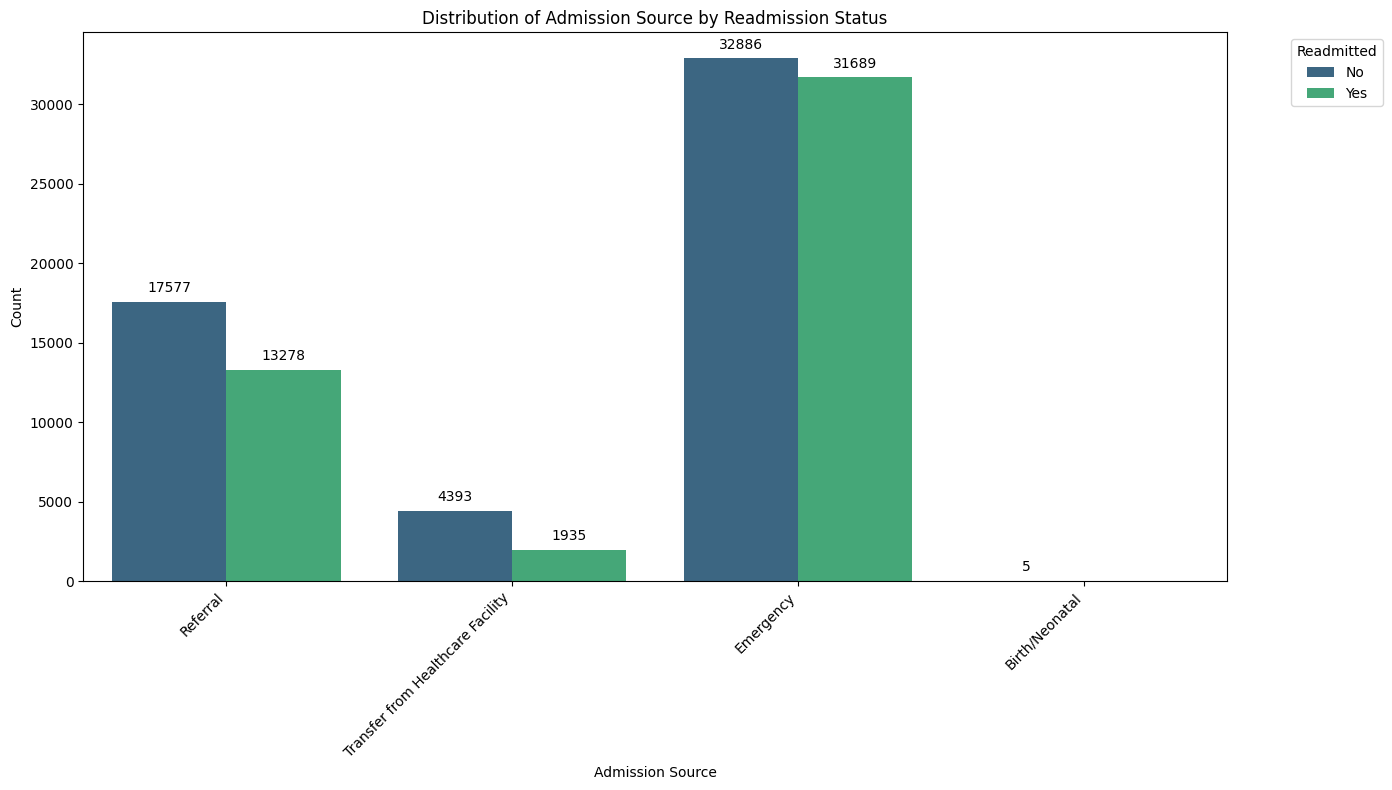

In [73]:
admission_labels = {
    0: "Referral",
    1: "Transfer from Healthcare Facility",
    2: "Emergency",
    3: "Birth/Neonatal",
    4: "Readmission/Home Health"
}

# Plot grouped bars by readmission status
plt.figure(figsize=(14, 8))
ax = sns.countplot(
    data=df,
    x="admission_source_id",
    hue="readmitted",  # Split bars by readmission status
    palette="viridis"
)

# Update x-tick labels using admission_labels
ax.set_xticklabels(
    [admission_labels[x] for x in ax.get_xticks()],
    rotation=45,
    ha="right"
)

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip annotations for empty bars
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

# Update legend to show "No" and "Yes" labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['No', 'Yes'],  # Replace 0/1 with labels
    title='Readmitted',
    bbox_to_anchor=(1.05, 1),  # Move legend outside
    loc='upper left'
)

# Titles and labels
plt.xlabel("Admission Source")
plt.ylabel("Count")
plt.title("Distribution of Admission Source by Readmission Status")
plt.tight_layout()
plt.show()

C:\Users\MMU50\AppData\Local\Temp\ipykernel_12476\2323561981.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


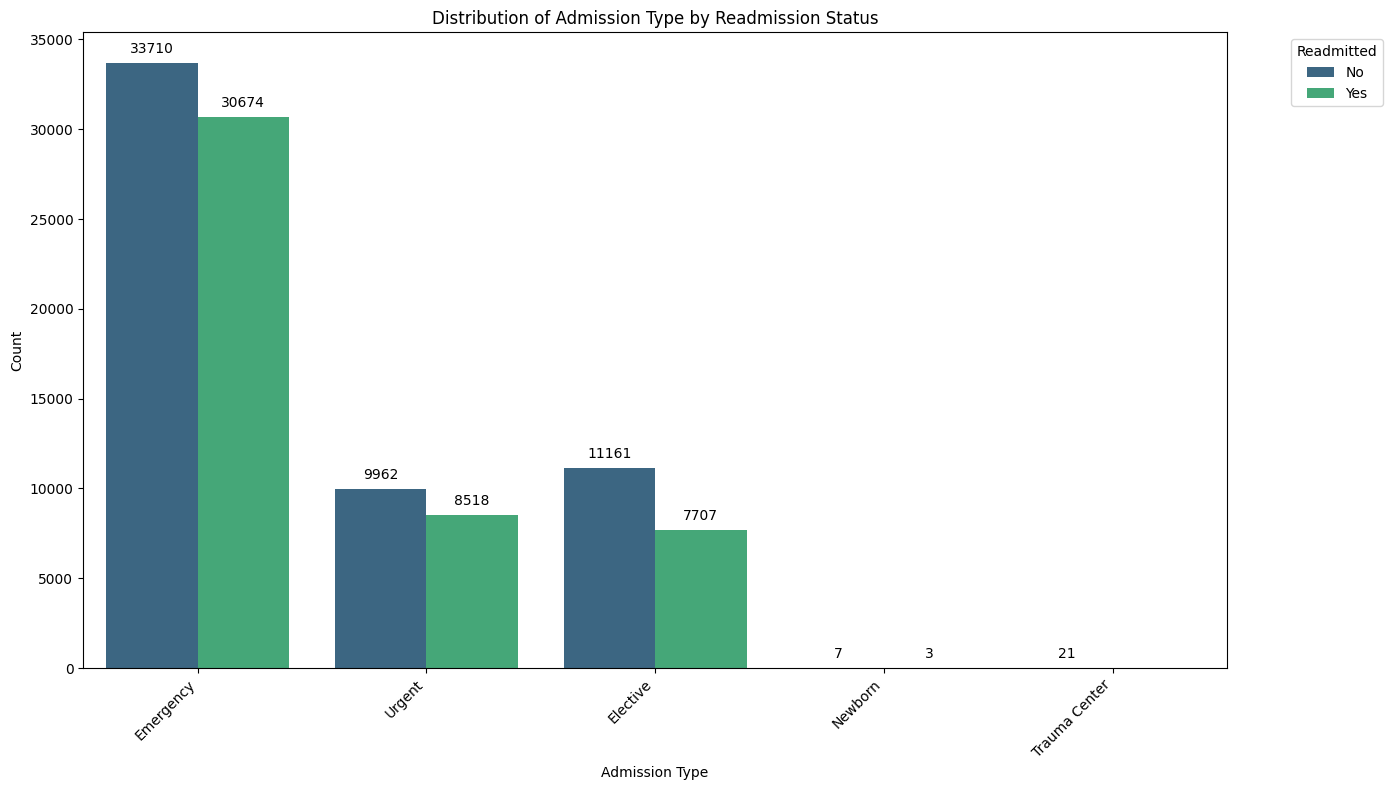

In [74]:
admission_type_labels = {
    0: "Emergency",
    1: "Urgent",
    2: "Elective",
    3: "Newborn",
    4: "Trauma Center"
}

# Create a grouped bar plot with readmission status
plt.figure(figsize=(14, 8))  # Increased width for better spacing
ax = sns.countplot(
    data=df,
    x="admission_type_id",
    hue="readmitted",  # Split bars by readmission status
    palette="viridis"
)

# Update x-axis labels using the admission type mapping
ax.set_xticklabels(
    [admission_type_labels[x] for x in ax.get_xticks()],
    rotation=45,
    ha="right"
)

# Annotate each bar with its count
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip annotations for empty bars
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            xytext=(0, 5),  # Small vertical offset
            textcoords='offset points'
        )

# Update legend to show "No" and "Yes" labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['No', 'Yes'],  # Replace 0/1 with meaningful labels
    title='Readmitted',
    bbox_to_anchor=(1.05, 1),  # Move legend outside the plot
    loc='upper left'
)

# Titles and labels
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.title("Distribution of Admission Type by Readmission Status")
plt.tight_layout()  # Adjust spacing
plt.show()

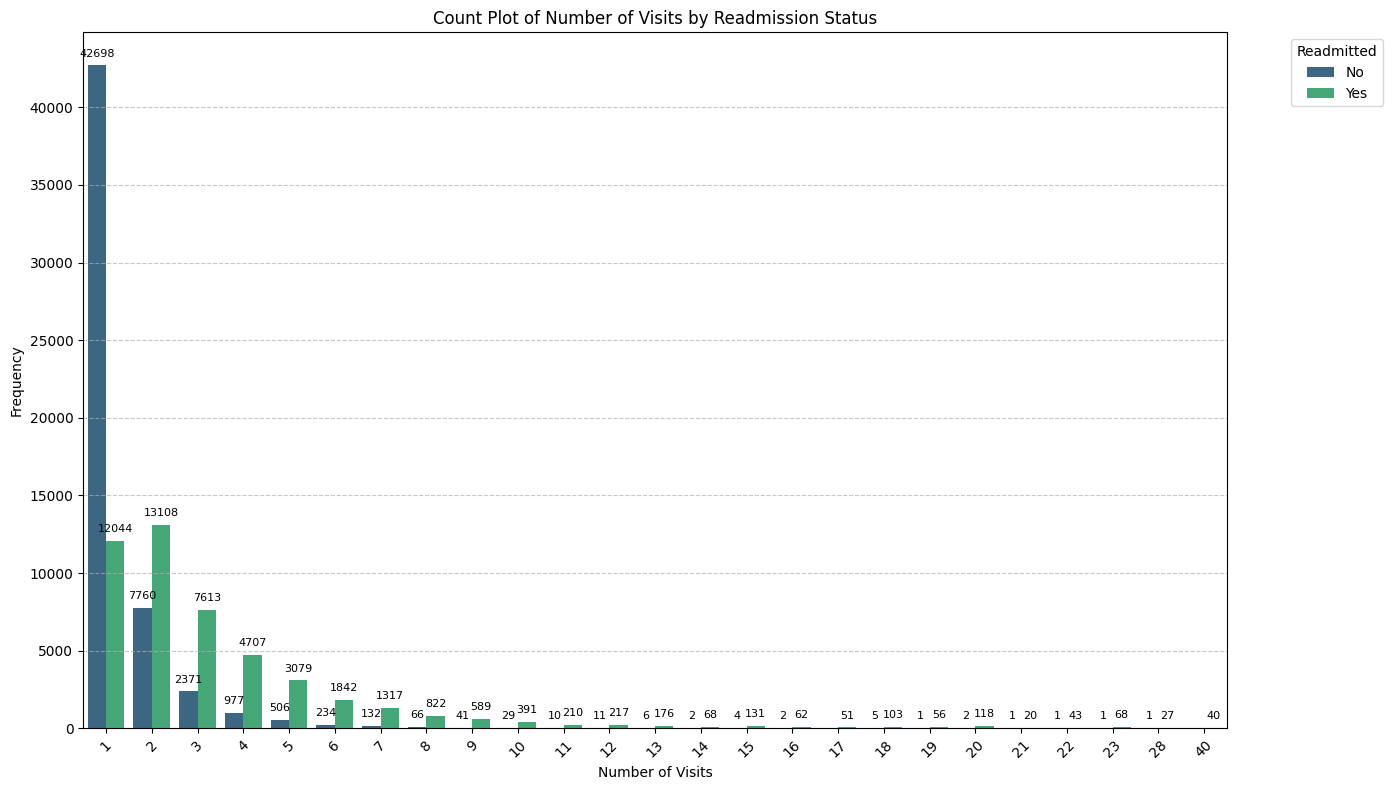

In [75]:
plt.figure(figsize=(14, 8))  # Increased width for better spacing
ax = sns.countplot(
    x=df['number_of_visits'],
    hue=df['readmitted'],  # Split bars by readmission status
    palette="viridis"
)

# Annotate the bars with count values
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip annotations for empty bars
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=8,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

# Titles and labels
plt.xlabel("Number of Visits")
plt.ylabel("Frequency")
plt.title("Count Plot of Number of Visits by Readmission Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

# Update legend labels from 0/1 to "No"/"Yes"
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['No', 'Yes'],  # Replace 0/1 with meaningful labels
    title='Readmitted',
    bbox_to_anchor=(1.05, 1),  # Move legend outside plot
    loc='upper left'
)

plt.tight_layout()  # Adjust spacing
plt.show()

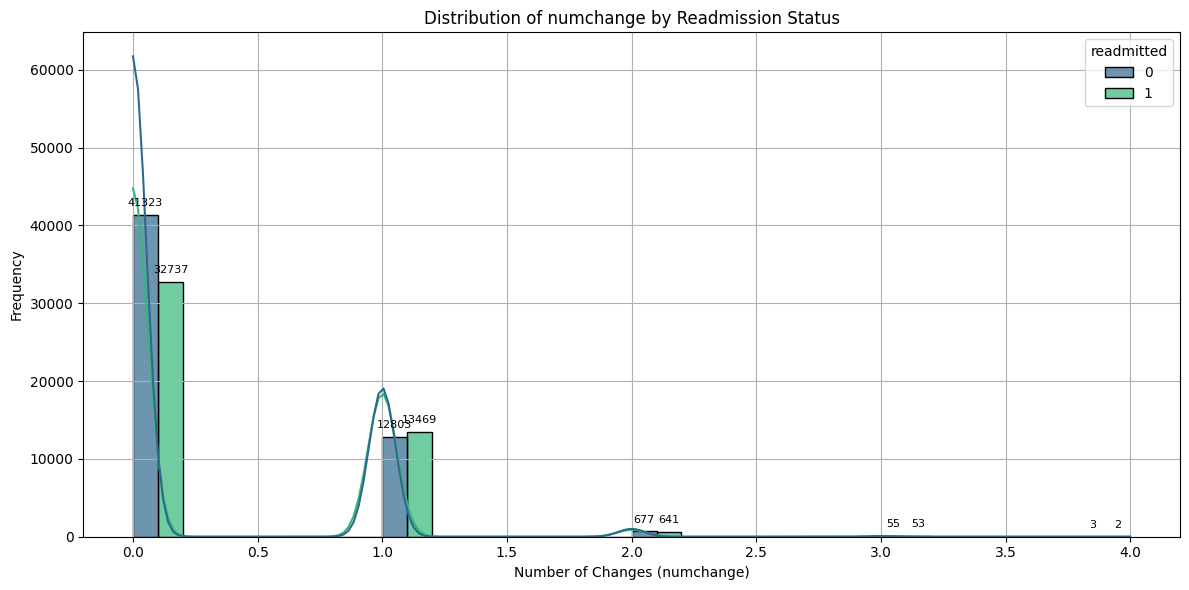

In [76]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=df,
    x='numchange',
    hue='readmitted',  # Split distribution by readmission status
    kde=True,
    bins=20,
    palette="viridis",
    multiple="dodge",  # Group bars side-by-side instead of stacking
    alpha=0.7  # Adjust transparency for better visibility
)

# Annotate bars with counts for both "No" and "Yes" groups
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip empty bars
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=8,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

# Titles and labels
plt.xlabel("Number of Changes (numchange)")
plt.ylabel("Frequency")
plt.title("Distribution of numchange by Readmission Status")
plt.grid(True)
plt.tight_layout()
plt.show()

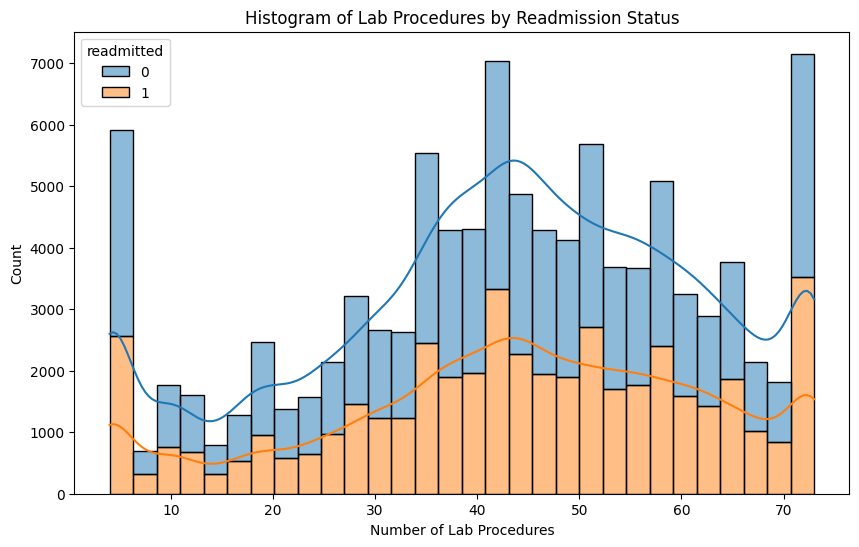

In [77]:
plt.figure(figsize=(10,6))

# Plot histogram with readmission categories
sns.histplot(data=df, x="num_lab_procedures", hue="readmitted", kde=True, bins=30, multiple="stack")

# Labels and title
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Count")
plt.title("Histogram of Lab Procedures by Readmission Status")

plt.show()

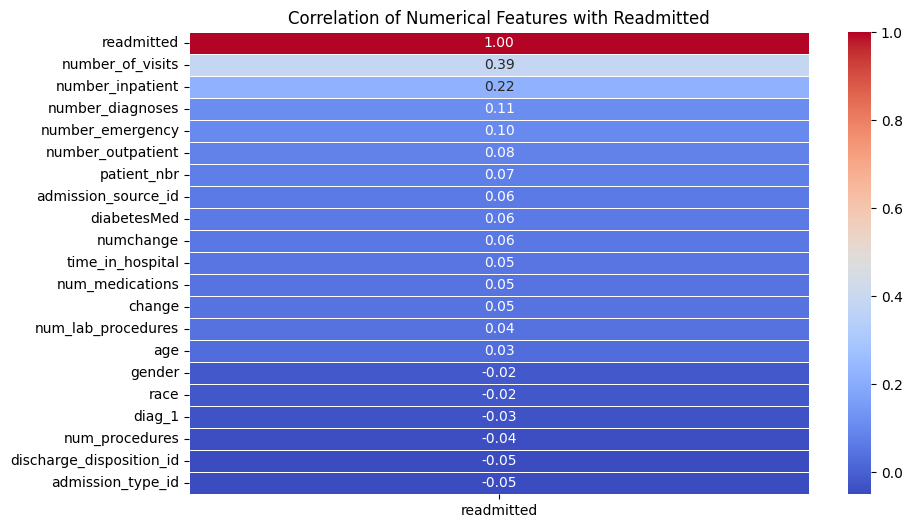

In [78]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Extract correlation with 'readmitted'
readmitted_corr = corr_matrix['readmitted'].sort_values(ascending=False)

# Plot heatmap of correlations with 'readmitted'
plt.figure(figsize=(10, 6))
sns.heatmap(readmitted_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Numerical Features with Readmitted")
plt.show()

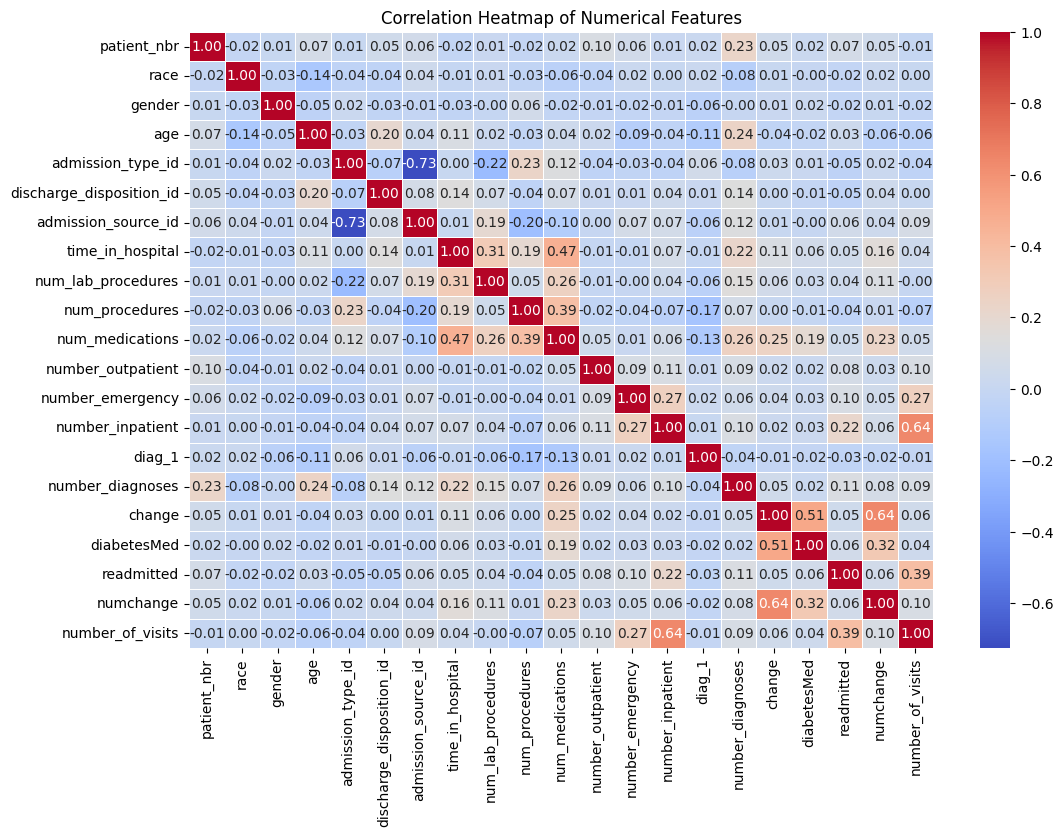

In [79]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

EXPORTING DATASET

In [80]:
df.to_csv(r"C:\\Users\\MMU50\\OneDrive\\Desktop\\FYP_Cleaned.csv", index=False)